In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter
import plotly.express as px

In [43]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt.cla import CLA
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter

import pandas_ta as ta
import seaborn as sns

In [44]:
from moexalgo import Ticker
import pandas as pd

# Загружаем данные по SBER
sber = Ticker('SBER')

# Правильные параметры: start и end (в формате 'YYYY-MM-DD')
candles = sber.candles(start='2024-01-01', end='2024-04-01', period= '1m')  # 'D' — дневные свечи

# Преобразуем в DataFrame
df = pd.DataFrame(candles)
df['date'] = pd.to_datetime(df['begin'])  # Дата в правильном формате
df.set_index('date', inplace=True)

print(df.tail())

              open   close    high     low         value       volume  \
date                                                                    
2024-01-01  271.90  276.00  279.17  271.00  1.120638e+11  406989360.0   
2024-02-01  276.03  292.19  293.95  275.93  1.854369e+11  647659560.0   
2024-03-01  292.20  298.72  302.95  291.05  1.930933e+11  650186230.0   
2024-04-01  300.00  308.24  315.79  298.95  1.923083e+11  625195720.0   

                begin        end  
date                              
2024-01-01 2024-01-01 2024-01-31  
2024-02-01 2024-02-01 2024-02-29  
2024-03-01 2024-03-01 2024-03-30  
2024-04-01 2024-04-01 2024-04-30  


In [45]:
import moexalgo

In [46]:
from moexalgo import Index, Market


In [47]:
shares = Market('shares')  
shares.tickers()

ticker   shortname  lotsize  decimals  minstep   issuesize          isin  \
0     ABIO  iАРТГЕН ао       10         2    0.020    92645451  RU000A0JNAB6   
1     ABRD  АбрауДюрсо       10         1    0.200    98000184  RU000A0JS5T7   
2     AFKS  Система ао      100         3    0.001  9650000000  RU000A0DQZE3   
3     AFLT    Аэрофлот       10         2    0.010  3975771215  RU0009062285   
4     AGRO    AGRO-гдр        1         1    0.200           0  US7496552057   
..     ...         ...      ...       ...      ...         ...           ...   
254   YRSB     ТНСэнЯр       10         0    2.000    17143584  RU000A0D8760   
255  YRSBP   ТНСэнЯр-п       10         1    0.500     4507320  RU000A0D88B3   
256   ZAYM   Займер ао       10         2    0.050   100000000  RU000A107RM8   
257   ZILL      ЗИЛ ао        1         0    5.000     2659962  RU0009086193   
258   ZVEZ   ЗВЕЗДА ао     1000         2    0.010   562020480  RU0009091300   

        regnumber  listlevel  
0    1-01-08902-A          2  
1    1-02-12500-A          3  
2    1-05-01669-A          1  
3    1-01-00010-A          1  
4            None          3  
..            ...        ...  
254  1-01-50099-A          3  
255  2-01-50099-A          3  
256  1-01-16767-A          3  
257  1-02-00036-A          3  
258  1-01-00169-D          3  

[259 rows x 9 columns]

In [48]:
import requests
import pandas as pd

# Запрос состава индекса IMOEX
url = "https://iss.moex.com/iss/statistics/engines/stock/markets/index/analytics/IMOEX.json"
response = requests.get(url)
response_dict = response.json()

In [49]:
import pandas as pd

# Извлекаем данные и колонки
columns = response_dict['analytics']['columns']
data = response_dict['analytics']['data']

# Создаем DataFrame
df = pd.DataFrame(data, columns=columns)
print(df)

   indexid   tradedate ticker  shortnames secids  weight  tradingsession
0    IMOEX  2025-05-16   AFKS  Система ао   AFKS    0.45               3
1    IMOEX  2025-05-16   AFLT    Аэрофлот   AFLT    0.87               3
2    IMOEX  2025-05-16   ALRS   АЛРОСА ао   ALRS    0.76               3
3    IMOEX  2025-05-16   ASTR    Астра ао   ASTR    0.20               3
4    IMOEX  2025-05-16   BSPB      БСП ао   BSPB    0.44               3
5    IMOEX  2025-05-16   CBOM      МКБ ао   CBOM    0.60               3
6    IMOEX  2025-05-16   CHMF    СевСт-ао   CHMF    1.24               3
7    IMOEX  2025-05-16   ENPG  ЭН+ГРУП ао   ENPG    0.34               3
8    IMOEX  2025-05-16   FEES     Россети   FEES    0.25               3
9    IMOEX  2025-05-16   FLOT  Совкомфлот   FLOT    0.35               3
10   IMOEX  2025-05-16   GAZP  ГАЗПРОМ ао   GAZP   12.90               3
11   IMOEX  2025-05-16   GMKN   ГМКНорНик   GMKN    3.42               3
12   IMOEX  2025-05-16   HEAD   Хэдхантер   HEAD   

In [50]:
def get_full_imoex_list():
    url = "https://iss.moex.com/iss/statistics/engines/stock/markets/index/analytics/IMOEX.json"
    params = {'iss.meta': 'off', 'limit': 100}
    response = requests.get(url, params=params)
    data = response.json()
    
    # Проверяем пагинацию
    cursor = data['analytics.cursor']['data'][0]
    total = cursor[1]  # Общее количество бумаг
    
    if len(data['analytics']['data']) < total:
        print(f"Внимание: получено {len(data['analytics']['data'])} из {total} бумаг. Увеличьте `limit`.")
    
    # Создаем DataFrame
    df = pd.DataFrame(
        data['analytics']['data'],
        columns=data['analytics']['columns']
    )
    return df

df1 = get_full_imoex_list()
print(df1[['ticker', 'shortnames', 'weight']])

   ticker  shortnames  weight
0    AFKS  Система ао    0.45
1    AFLT    Аэрофлот    0.87
2    ALRS   АЛРОСА ао    0.76
3    ASTR    Астра ао    0.20
4    BSPB      БСП ао    0.44
5    CBOM      МКБ ао    0.60
6    CHMF    СевСт-ао    1.24
7    ENPG  ЭН+ГРУП ао    0.34
8    FEES     Россети    0.25
9    FLOT  Совкомфлот    0.35
10   GAZP  ГАЗПРОМ ао   12.90
11   GMKN   ГМКНорНик    3.42
12   HEAD   Хэдхантер    0.99
13   HYDR    РусГидро    0.20
14   IRAO  ИнтерРАОао    1.30
15   LKOH      ЛУКОЙЛ   14.92
16   MAGN         ММК    0.66
17   MDMG     MDMG-ао    0.29
18   MOEX    МосБиржа    1.35
19   MSNG  +МосЭнерго    0.25
20   MTLR    Мечел ао    0.15
21   MTSS      МТС-ао    1.12
22   NLMK     НЛМК ао    1.25
23   NVTK  Новатэк ао    4.60
24   PHOR  ФосАгро ао    0.70
25   PIKK      ПИК ао    1.06
26   PLZL       Полюс    3.16
27   POSI    iПозитив    0.29
28   RENI   Ренессанс    0.26
29   ROSN    Роснефть    3.24
30   RTKM  Ростел -ао    0.59
31   RUAL    РУСАЛ ао    1.00
32   SBER 

In [51]:
names = df1.ticker.values

In [52]:
from moexalgo import Ticker
import pandas as pd
from tqdm import tqdm  # для прогресс-бара

# Список тикеров (пример)
# tickers = ['SBER', 'GAZP', 'LKOH', 'GMKN', 'MOEX', 'YNDX', 'TATN', 'ROSN', 'NVTK', 'ALRS']

In [53]:
def get_candles_for_tickers(ticker_list, start_date, end_date, period='D'):
    """
    Получает свечные данные для списка тикеров
    
    Параметры:
        ticker_list: список тикеров
        start_date: начальная дата ('YYYY-MM-DD')
        end_date: конечная дата ('YYYY-MM-DD')
        period: период свечей ('D' - день, '1h' - час и т.д.)
    
    Возвращает:
        Объединенный DataFrame с колонками:
        ['ticker_name','open','close','high','low','value','volume','begin','end']
    """
    all_data = []
    
    for ticker_name in ticker_list:
        try:
            # Получаем данные
            ticker = Ticker(ticker_name)
            candles = ticker.candles(start=start_date, end=end_date, period=period)
            
            # Конвертируем в DataFrame
            df = pd.DataFrame(candles)
            df['ticker_name'] = ticker_name  # Добавляем колонку с тикером
            
            # Выбираем нужные колонки
            cols = ['ticker_name', 'open', 'close', 'high', 'low', 'value', 'volume', 'begin', 'end']
            df = df[cols]
            
            all_data.append(df)
            
        except Exception as e:
            print(f'Ошибка для {ticker_name}: {str(e)}')
    
    # Объединяем все данные
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

In [54]:
pivot_df = pd.read_csv('pivot_df.csv',sep=',')
pivot_df2 = pd.read_csv('pivot_df2.csv',sep=',')


# МОДЕЛЬ 

In [55]:
print(pivot_df.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
begin           0
AFKS            0
AFLT            0
ALRS            0
CBOM            0
CHMF            0
ENPG            0
GAZP            0
HYDR            0
IRAO            0
LKOH            0
MAGN            0
MSNG            0
MTLR            0
MTSS            0
NLMK            0
NVTK            0
PHOR            0
PIKK            0
PLZL            0
POSI            0
RENI            0
ROSN            0
RTKM            0
RUAL            0
SBER            0
SBERP           0
SELG            0
SNGS            0
SNGSP           0
TATN            0
TATNP           0
TRNFP           0
UPRO            0
VTBR            0
dtype: int64


In [59]:
pivot_df.drop(['Unnamed: 0.1', 'Unnamed: 0'],inplace=True,axis=1)

In [61]:
pivot_df

begin    AFKS   AFLT    ALRS    CBOM    CHMF    ENPG    GAZP  \
0    2022-01-03  24.517  60.70  123.27   7.041  1619.8  918.00  353.73   
1    2022-01-04  24.708  63.30  123.82   7.102  1603.4  915.50  352.55   
2    2022-01-05  23.593  60.98  117.71   7.036  1575.2  896.00  335.00   
3    2022-01-06  24.200  62.96  119.33   6.990  1584.0  930.00  346.13   
4    2022-01-10  23.861  63.02  117.48   6.980  1554.6  946.50  344.00   
..          ...     ...    ...     ...     ...     ...     ...     ...   
739  2024-12-25  14.155  54.86   52.96   9.772  1161.8  322.70  128.11   
740  2024-12-26  14.087  55.04   54.00  10.020  1174.4  325.15  126.89   
741  2024-12-27  14.278  55.65   54.69   9.916  1186.2  325.80  127.79   
742  2024-12-28  14.738  58.38   56.42   9.943  1232.2  334.30  129.60   
743  2024-12-30  15.594  59.06   57.86  10.247  1337.4  348.20  133.12   

       HYDR    IRAO  ...    SBER   SBERP   SELG    SNGS   SNGSP   TATN  TATNP  \
0    0.7493  4.3850  ...  305.47  289.74  57.98  39.600  38.870  515.4  472.1   
1    0.7577  4.4135  ...  304.24  289.01  58.19  40.175  39.715  515.4  473.8   
2    0.7341  4.2340  ...  287.01  274.80  57.74  38.750  39.075  492.6  453.0   
3    0.7477  4.2475  ...  293.92  279.05  56.44  39.125  38.900  496.4  459.0   
4    0.7437  4.2940  ...  291.69  277.80  55.02  39.290  38.955  499.8  460.0   
..      ...     ...  ...     ...     ...    ...     ...     ...    ...    ...   
739  0.5025  3.7145  ...  271.69  270.32  40.83  23.655  57.885  629.2  628.5   
740  0.4984  3.6590  ...  269.56  269.25  40.23  24.000  58.515  630.9  630.5   
741  0.4996  3.6670  ...  271.20  272.01  40.28  23.870  59.300  635.8  633.0   
742  0.5052  3.6750  ...  272.83  273.50  40.79  24.115  59.105  652.4  647.5   
743  0.5206  3.7290  ...  279.43  279.59  41.65  24.980  60.490  688.9  680.3   

      TRNFP   UPRO     VTBR  
0    1599.0  2.624  247.250  
1    1601.0  2.645  248.500  
2    1565.0  2.631  236.800  
3    1600.0  2.617  242.225  
4    1571.0  2.612  244.750  
..      ...    ...      ...  
739  1125.0  1.750   76.530  
740  1126.5  1.727   75.740  
741  1151.0  1.721   76.490  
742  1232.0  1.752   78.090  
743  1230.5  1.827   80.030  

[744 rows x 35 columns]

In [62]:
pivot_df.isnull().sum()

begin    0
AFKS     0
AFLT     0
ALRS     0
CBOM     0
CHMF     0
ENPG     0
GAZP     0
HYDR     0
IRAO     0
LKOH     0
MAGN     0
MSNG     0
MTLR     0
MTSS     0
NLMK     0
NVTK     0
PHOR     0
PIKK     0
PLZL     0
POSI     0
RENI     0
ROSN     0
RTKM     0
RUAL     0
SBER     0
SBERP    0
SELG     0
SNGS     0
SNGSP    0
TATN     0
TATNP    0
TRNFP    0
UPRO     0
VTBR     0
dtype: int64

In [63]:
cols_with_missing = pivot_df.columns[pivot_df.isnull().any()]
cols_with_missing

Index([], dtype='object')

In [64]:
for col in cols_with_missing:
    pivot_df[col] = pivot_df[col].fillna(
        pivot_df[col].rolling(
            window=20,      # Размер окна
            min_periods=1,  # Минимальное число значений в окне для расчета
            center=True      # Центрированное окно (7 значений до и после)
        ).mean()
    )

In [65]:
df  = pivot_df

In [66]:
df

begin    AFKS   AFLT    ALRS    CBOM    CHMF    ENPG    GAZP  \
0    2022-01-03  24.517  60.70  123.27   7.041  1619.8  918.00  353.73   
1    2022-01-04  24.708  63.30  123.82   7.102  1603.4  915.50  352.55   
2    2022-01-05  23.593  60.98  117.71   7.036  1575.2  896.00  335.00   
3    2022-01-06  24.200  62.96  119.33   6.990  1584.0  930.00  346.13   
4    2022-01-10  23.861  63.02  117.48   6.980  1554.6  946.50  344.00   
..          ...     ...    ...     ...     ...     ...     ...     ...   
739  2024-12-25  14.155  54.86   52.96   9.772  1161.8  322.70  128.11   
740  2024-12-26  14.087  55.04   54.00  10.020  1174.4  325.15  126.89   
741  2024-12-27  14.278  55.65   54.69   9.916  1186.2  325.80  127.79   
742  2024-12-28  14.738  58.38   56.42   9.943  1232.2  334.30  129.60   
743  2024-12-30  15.594  59.06   57.86  10.247  1337.4  348.20  133.12   

       HYDR    IRAO  ...    SBER   SBERP   SELG    SNGS   SNGSP   TATN  TATNP  \
0    0.7493  4.3850  ...  305.47  289.74  57.98  39.600  38.870  515.4  472.1   
1    0.7577  4.4135  ...  304.24  289.01  58.19  40.175  39.715  515.4  473.8   
2    0.7341  4.2340  ...  287.01  274.80  57.74  38.750  39.075  492.6  453.0   
3    0.7477  4.2475  ...  293.92  279.05  56.44  39.125  38.900  496.4  459.0   
4    0.7437  4.2940  ...  291.69  277.80  55.02  39.290  38.955  499.8  460.0   
..      ...     ...  ...     ...     ...    ...     ...     ...    ...    ...   
739  0.5025  3.7145  ...  271.69  270.32  40.83  23.655  57.885  629.2  628.5   
740  0.4984  3.6590  ...  269.56  269.25  40.23  24.000  58.515  630.9  630.5   
741  0.4996  3.6670  ...  271.20  272.01  40.28  23.870  59.300  635.8  633.0   
742  0.5052  3.6750  ...  272.83  273.50  40.79  24.115  59.105  652.4  647.5   
743  0.5206  3.7290  ...  279.43  279.59  41.65  24.980  60.490  688.9  680.3   

      TRNFP   UPRO     VTBR  
0    1599.0  2.624  247.250  
1    1601.0  2.645  248.500  
2    1565.0  2.631  236.800  
3    1600.0  2.617  242.225  
4    1571.0  2.612  244.750  
..      ...    ...      ...  
739  1125.0  1.750   76.530  
740  1126.5  1.727   75.740  
741  1151.0  1.721   76.490  
742  1232.0  1.752   78.090  
743  1230.5  1.827   80.030  

[744 rows x 35 columns]

In [67]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   begin   744 non-null    object 
 1   AFKS    744 non-null    float64
 2   AFLT    744 non-null    float64
 3   ALRS    744 non-null    float64
 4   CBOM    744 non-null    float64
 5   CHMF    744 non-null    float64
 6   ENPG    744 non-null    float64
 7   GAZP    744 non-null    float64
 8   HYDR    744 non-null    float64
 9   IRAO    744 non-null    float64
 10  LKOH    744 non-null    float64
 11  MAGN    744 non-null    float64
 12  MSNG    744 non-null    float64
 13  MTLR    744 non-null    float64
 14  MTSS    744 non-null    float64
 15  NLMK    744 non-null    float64
 16  NVTK    744 non-null    float64
 17  PHOR    744 non-null    float64
 18  PIKK    744 non-null    float64
 19  PLZL    744 non-null    float64
 20  POSI    744 non-null    float64
 21  RENI    744 non-null    float64
 22  RO

In [68]:
pivot_df = pivot_df.set_index('begin')

In [69]:
pivot_df

AFKS   AFLT    ALRS    CBOM    CHMF    ENPG    GAZP    HYDR  \
begin                                                                       
2022-01-03  24.517  60.70  123.27   7.041  1619.8  918.00  353.73  0.7493   
2022-01-04  24.708  63.30  123.82   7.102  1603.4  915.50  352.55  0.7577   
2022-01-05  23.593  60.98  117.71   7.036  1575.2  896.00  335.00  0.7341   
2022-01-06  24.200  62.96  119.33   6.990  1584.0  930.00  346.13  0.7477   
2022-01-10  23.861  63.02  117.48   6.980  1554.6  946.50  344.00  0.7437   
...            ...    ...     ...     ...     ...     ...     ...     ...   
2024-12-25  14.155  54.86   52.96   9.772  1161.8  322.70  128.11  0.5025   
2024-12-26  14.087  55.04   54.00  10.020  1174.4  325.15  126.89  0.4984   
2024-12-27  14.278  55.65   54.69   9.916  1186.2  325.80  127.79  0.4996   
2024-12-28  14.738  58.38   56.42   9.943  1232.2  334.30  129.60  0.5052   
2024-12-30  15.594  59.06   57.86  10.247  1337.4  348.20  133.12  0.5206   

              IRAO    LKOH  ...    SBER   SBERP   SELG    SNGS   SNGSP   TATN  \
begin                       ...                                                 
2022-01-03  4.3850  6683.0  ...  305.47  289.74  57.98  39.600  38.870  515.4   
2022-01-04  4.4135  6728.0  ...  304.24  289.01  58.19  40.175  39.715  515.4   
2022-01-05  4.2340  6522.0  ...  287.01  274.80  57.74  38.750  39.075  492.6   
2022-01-06  4.2475  6699.0  ...  293.92  279.05  56.44  39.125  38.900  496.4   
2022-01-10  4.2940  6775.0  ...  291.69  277.80  55.02  39.290  38.955  499.8   
...            ...     ...  ...     ...     ...    ...     ...     ...    ...   
2024-12-25  3.7145  6987.5  ...  271.69  270.32  40.83  23.655  57.885  629.2   
2024-12-26  3.6590  7003.0  ...  269.56  269.25  40.23  24.000  58.515  630.9   
2024-12-27  3.6670  6990.5  ...  271.20  272.01  40.28  23.870  59.300  635.8   
2024-12-28  3.6750  6998.0  ...  272.83  273.50  40.79  24.115  59.105  652.4   
2024-12-30  3.7290  7235.0  ...  279.43  279.59  41.65  24.980  60.490  688.9   

            TATNP   TRNFP   UPRO     VTBR  
begin                                      
2022-01-03  472.1  1599.0  2.624  247.250  
2022-01-04  473.8  1601.0  2.645  248.500  
2022-01-05  453.0  1565.0  2.631  236.800  
2022-01-06  459.0  1600.0  2.617  242.225  
2022-01-10  460.0  1571.0  2.612  244.750  
...           ...     ...    ...      ...  
2024-12-25  628.5  1125.0  1.750   76.530  
2024-12-26  630.5  1126.5  1.727   75.740  
2024-12-27  633.0  1151.0  1.721   76.490  
2024-12-28  647.5  1232.0  1.752   78.090  
2024-12-30  680.3  1230.5  1.827   80.030  

[744 rows x 34 columns]

In [70]:
#Годовая доходность
mu = expected_returns.mean_historical_return(pivot_df) 
#Дисперсия портфеля
Sigma = risk_models.sample_cov(pivot_df)
#Максимальный коэффициент Шарпа

In [71]:
# Создаем объект эффективной границы
ef = EfficientFrontier(mu, Sigma)

# Оптимизация для максимального коэффициента Шарпа
weights = ef.max_sharpe()

# Очистка весов (округление и удаление нулевых позиций)
cleaned_weights = ef.clean_weights()

# Вывод весов
print("Веса активов в портфеле:")
for ticker, weight in cleaned_weights.items():
    if weight > 0.001:  # Показываем только значимые веса
        print(f"{ticker}: {weight:.2%}")

# Показатели портфеля
expected_return, volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)

Веса активов в портфеле:
CBOM: 31.72%
POSI: 51.25%
SNGSP: 17.03%
Expected annual return: 24.9%
Annual volatility: 36.6%
Sharpe Ratio: 0.68


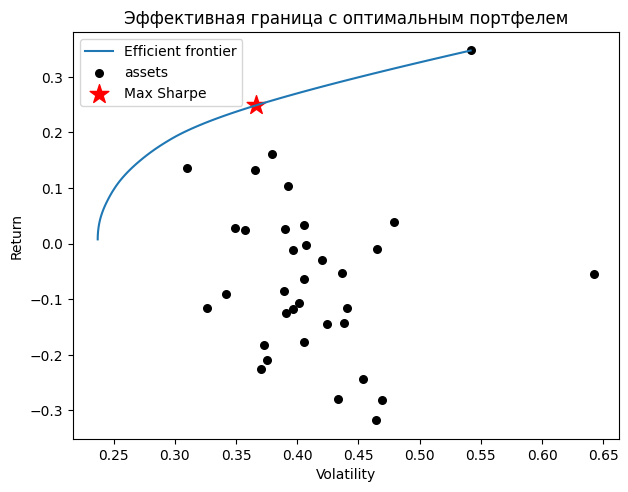

In [72]:
# Оптимизация
ef_optimize = EfficientFrontier(mu, Sigma)
weights = ef_optimize.max_sharpe()
expected_return, volatility, _ = ef_optimize.portfolio_performance()

# Визуализация
ef_plot = EfficientFrontier(mu, Sigma)
fig, ax = plt.subplots()
pplt.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

# Добавляем точку оптимизированного портфеля
ax.scatter(volatility, expected_return, marker="*", s=200, c="red", label="Max Sharpe")
ax.legend()

plt.title("Эффективная граница с оптимальным портфелем")
plt.show()

In [73]:

ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('AFKS', 0.0), ('AFLT', 0.0), ('ALRS', 0.0), ('CBOM', 0.31721), ('CHMF', 0.0), ('ENPG', 0.0), ('GAZP', 0.0), ('HYDR', 0.0), ('IRAO', 0.0), ('LKOH', 0.0), ('MAGN', 0.0), ('MSNG', 0.0), ('MTLR', 0.0), ('MTSS', 0.0), ('NLMK', 0.0), ('NVTK', 0.0), ('PHOR', 0.0), ('PIKK', 0.0), ('PLZL', 0.0), ('POSI', 0.51253), ('RENI', 0.0), ('ROSN', 0.0), ('RTKM', 0.0), ('RUAL', 0.0), ('SBER', 0.0), ('SBERP', 0.0), ('SELG', 0.0), ('SNGS', 0.0), ('SNGSP', 0.17026), ('TATN', 0.0), ('TATNP', 0.0), ('TRNFP', 0.0), ('UPRO', 0.0), ('VTBR', 0.0)])


In [74]:
ef.portfolio_performance(verbose=True, risk_free_rate = 0.08)

Expected annual return: 24.9%
Annual volatility: 36.6%
Sharpe Ratio: 0.68


C:\PerfLogs\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.24874085699100398, 0.3661575620966633, 0.6793273790842478)

In [75]:
ef = EfficientFrontier(mu, Sigma)
weights = ef.max_sharpe(risk_free_rate=0.09)
cleaned_weights = ef.clean_weights()

In [76]:
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) 
minvol=ef1.min_volatility()
minvol_pwt=ef1.clean_weights()
print(minvol_pwt)

OrderedDict([('AFKS', 0.0), ('AFLT', 0.0), ('ALRS', 0.0), ('CBOM', 0.241), ('CHMF', 0.0), ('ENPG', 0.0), ('GAZP', 0.0), ('HYDR', 0.13294), ('IRAO', 0.0), ('LKOH', 0.01587), ('MAGN', 0.0), ('MSNG', 0.01913), ('MTLR', 0.0), ('MTSS', 0.10247), ('NLMK', 0.0), ('NVTK', 0.0), ('PHOR', 0.26467), ('PIKK', 0.0), ('PLZL', 0.04748), ('POSI', 0.0), ('RENI', 0.04258), ('ROSN', 0.0), ('RTKM', 0.02088), ('RUAL', 0.0), ('SBER', 0.0), ('SBERP', 0.0), ('SELG', 0.02102), ('SNGS', 0.0), ('SNGSP', 0.01522), ('TATN', 0.0), ('TATNP', 0.0), ('TRNFP', 0.0767), ('UPRO', 0.0), ('VTBR', 0.0)])


In [77]:
ef1.portfolio_performance(verbose=True, risk_free_rate = 0.08)

Expected annual return: 0.8%
Annual volatility: 23.7%
Sharpe Ratio: -0.31


(0.007612093996926519, 0.23691473125622886, -0.3055441323519231)

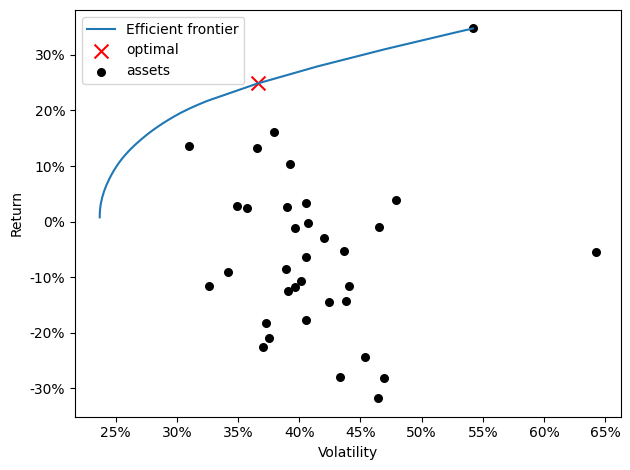

In [78]:
cl_obj = CLA(mu, Sigma)
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# 

In [79]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [80]:
returns_df = np.log(pivot_df / pivot_df.shift(1))

In [81]:
returns_df = returns_df.iloc[1:]

In [82]:
returns_df

AFKS      AFLT      ALRS      CBOM      CHMF      ENPG  \
begin                                                                    
2022-01-04  0.007760  0.041942  0.004452  0.008626 -0.010176 -0.002727   
2022-01-05 -0.046177 -0.037339 -0.050605 -0.009337 -0.017744 -0.021530   
2022-01-06  0.025403  0.031954  0.013669 -0.006559  0.005571  0.037244   
2022-01-10 -0.014107  0.000953 -0.015625 -0.001432 -0.018735  0.017586   
2022-01-11  0.011211  0.002852  0.035373  0.020701  0.011385  0.012599   
...              ...       ...       ...       ...       ...       ...   
2024-12-25  0.029466  0.022862 -0.000378  0.035519  0.022633  0.036127   
2024-12-26 -0.004816  0.003276  0.019447  0.025062  0.010787  0.007564   
2024-12-27  0.013468  0.011022  0.012697 -0.010433  0.009998  0.001997   
2024-12-28  0.031709  0.047891  0.031143  0.002719  0.038046  0.025755   
2024-12-30  0.056457  0.011581  0.025203  0.030116  0.081926  0.040738   

                GAZP      HYDR      IRAO      LKOH  ...      SBER     SBERP  \
begin                                               ...                       
2022-01-04 -0.003341  0.011148  0.006478  0.006711  ... -0.004035 -0.002523   
2022-01-05 -0.051062 -0.031642 -0.041521 -0.031097  ... -0.058300 -0.050418   
2022-01-06  0.032684  0.018357  0.003183  0.026777  ...  0.023791  0.015347   
2022-01-10 -0.006173 -0.005364  0.010888  0.011281  ... -0.007616 -0.004490   
2022-01-11 -0.000756  0.011232  0.021997  0.006033  ...  0.000651  0.001259   
...              ...       ...       ...       ...  ...       ...       ...   
2024-12-25  0.051330  0.007190  0.010827  0.022359  ...  0.027426  0.024643   
2024-12-26 -0.009569 -0.008193 -0.015054  0.002216  ... -0.007871 -0.003966   
2024-12-27  0.007068  0.002405  0.002184 -0.001787  ...  0.006066  0.010199   
2024-12-28  0.014064  0.011147  0.002179  0.001072  ...  0.005992  0.005463   
2024-12-30  0.026798  0.030028  0.014587  0.033306  ...  0.023903  0.022023   

                SELG      SNGS     SNGSP      TATN     TATNP     TRNFP  \
begin                                                                    
2022-01-04  0.003615  0.014416  0.021506  0.000000  0.003594  0.001250   
2022-01-05 -0.007763 -0.036114 -0.016246 -0.045246 -0.044893 -0.022743   
2022-01-06 -0.022772  0.009631 -0.004489  0.007685  0.013158  0.022118   
2022-01-10 -0.025481  0.004208  0.001413  0.006826  0.002176 -0.018291   
2022-01-11  0.036932  0.025754  0.001155  0.016667  0.013817 -0.006706   
...              ...       ...       ...       ...       ...       ...   
2024-12-25  0.013810  0.000634  0.017339  0.006218  0.006225  0.065191   
2024-12-26 -0.014804  0.014479  0.010825  0.002698  0.003177  0.001332   
2024-12-27  0.001242 -0.005431  0.013326  0.007737  0.003957  0.021516   
2024-12-28  0.012582  0.010212 -0.003294  0.025774  0.022648  0.068008   
2024-12-30  0.020864  0.035241  0.023163  0.054438  0.049415 -0.001218   

                UPRO      VTBR  
begin                           
2022-01-04  0.007971  0.005043  
2022-01-05 -0.005307 -0.048227  
2022-01-06 -0.005335  0.022651  
2022-01-10 -0.001912  0.010370  
2022-01-11  0.000765  0.026410  
...              ...       ...  
2024-12-25  0.006881  0.035105  
2024-12-26 -0.013230 -0.010376  
2024-12-27 -0.003480  0.009854  
2024-12-28  0.017852  0.020702  
2024-12-30  0.041917  0.024540  

[743 rows x 34 columns]

In [83]:
returns_df.reset_index(inplace=True)

# Google News RSS

In [84]:
pivot_df

AFKS   AFLT    ALRS    CBOM    CHMF    ENPG    GAZP    HYDR  \
begin                                                                       
2022-01-03  24.517  60.70  123.27   7.041  1619.8  918.00  353.73  0.7493   
2022-01-04  24.708  63.30  123.82   7.102  1603.4  915.50  352.55  0.7577   
2022-01-05  23.593  60.98  117.71   7.036  1575.2  896.00  335.00  0.7341   
2022-01-06  24.200  62.96  119.33   6.990  1584.0  930.00  346.13  0.7477   
2022-01-10  23.861  63.02  117.48   6.980  1554.6  946.50  344.00  0.7437   
...            ...    ...     ...     ...     ...     ...     ...     ...   
2024-12-25  14.155  54.86   52.96   9.772  1161.8  322.70  128.11  0.5025   
2024-12-26  14.087  55.04   54.00  10.020  1174.4  325.15  126.89  0.4984   
2024-12-27  14.278  55.65   54.69   9.916  1186.2  325.80  127.79  0.4996   
2024-12-28  14.738  58.38   56.42   9.943  1232.2  334.30  129.60  0.5052   
2024-12-30  15.594  59.06   57.86  10.247  1337.4  348.20  133.12  0.5206   

              IRAO    LKOH  ...    SBER   SBERP   SELG    SNGS   SNGSP   TATN  \
begin                       ...                                                 
2022-01-03  4.3850  6683.0  ...  305.47  289.74  57.98  39.600  38.870  515.4   
2022-01-04  4.4135  6728.0  ...  304.24  289.01  58.19  40.175  39.715  515.4   
2022-01-05  4.2340  6522.0  ...  287.01  274.80  57.74  38.750  39.075  492.6   
2022-01-06  4.2475  6699.0  ...  293.92  279.05  56.44  39.125  38.900  496.4   
2022-01-10  4.2940  6775.0  ...  291.69  277.80  55.02  39.290  38.955  499.8   
...            ...     ...  ...     ...     ...    ...     ...     ...    ...   
2024-12-25  3.7145  6987.5  ...  271.69  270.32  40.83  23.655  57.885  629.2   
2024-12-26  3.6590  7003.0  ...  269.56  269.25  40.23  24.000  58.515  630.9   
2024-12-27  3.6670  6990.5  ...  271.20  272.01  40.28  23.870  59.300  635.8   
2024-12-28  3.6750  6998.0  ...  272.83  273.50  40.79  24.115  59.105  652.4   
2024-12-30  3.7290  7235.0  ...  279.43  279.59  41.65  24.980  60.490  688.9   

            TATNP   TRNFP   UPRO     VTBR  
begin                                      
2022-01-03  472.1  1599.0  2.624  247.250  
2022-01-04  473.8  1601.0  2.645  248.500  
2022-01-05  453.0  1565.0  2.631  236.800  
2022-01-06  459.0  1600.0  2.617  242.225  
2022-01-10  460.0  1571.0  2.612  244.750  
...           ...     ...    ...      ...  
2024-12-25  628.5  1125.0  1.750   76.530  
2024-12-26  630.5  1126.5  1.727   75.740  
2024-12-27  633.0  1151.0  1.721   76.490  
2024-12-28  647.5  1232.0  1.752   78.090  
2024-12-30  680.3  1230.5  1.827   80.030  

[744 rows x 34 columns]

In [85]:
data = pivot_df[['AFLT']]

In [86]:
data

AFLT
begin            
2022-01-03  60.70
2022-01-04  63.30
2022-01-05  60.98
2022-01-06  62.96
2022-01-10  63.02
...           ...
2024-12-25  54.86
2024-12-26  55.04
2024-12-27  55.65
2024-12-28  58.38
2024-12-30  59.06

[744 rows x 1 columns]

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# КОМИССИЯ

In [94]:
from scipy.optimize import minimize

In [95]:

# 1. Параметры
np.random.seed(42)
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
num_assets = len(tickers)
dates = pd.date_range(start='2022-01-01', periods=252)
commission = 0.002  # комиссия брокера
frequency = 21  # ребалансировка каждые N дней (например, 21 ≈ месяц)
initial_weights = np.array(num_assets * [1. / num_assets])

# 2. Генерация данных
prices = pd.DataFrame(np.random.rand(252, num_assets) * 100 + 100, columns=tickers, index=dates)
returns = prices.pct_change().dropna()

# 3. Целевая функция
def penalized_neg_sharpe_ratio(weights, mean_returns, cov_matrix, prev_weights, commission=0.002, risk_free_rate=0.0):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    rebalancing_cost = commission * np.sum(np.abs(weights - prev_weights))
    return -sharpe_ratio + rebalancing_cost

# 4. Ребалансировка с заданной частотой
weights_history = []
dates_history = []
prev_weights = initial_weights.copy()

for start in range(0, len(returns), frequency):
    end = start + frequency
    data_slice = returns.iloc[start:end]
    if len(data_slice) < frequency // 2:
        break

    mean_returns = data_slice.mean()
    cov_matrix = data_slice.cov()

    result = minimize(
        fun=penalized_neg_sharpe_ratio,
        x0=prev_weights,
        args=(mean_returns, cov_matrix, prev_weights, commission),
        method='SLSQP',
        bounds=tuple((0, 1) for _ in range(num_assets)),
        constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    )

    opt_weights = result.x
    weights_history.append(opt_weights)
    dates_history.append(data_slice.index[-1])
    prev_weights = opt_weights

weights_df = pd.DataFrame(weights_history, columns=tickers, index=dates_history)


In [96]:

# 5. Оптимизация на всём периоде без комиссии (статичный портфель)
mean_returns_full = returns.mean()
cov_matrix_full = returns.cov()

static_result = minimize(
    fun=penalized_neg_sharpe_ratio,
    x0=initial_weights,
    args=(mean_returns_full, cov_matrix_full, initial_weights, 0.0),
    method='SLSQP',
    bounds=tuple((0, 1) for _ in range(num_assets)),
    constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
)
static_weights = static_result.x

# 6. Функция расчета результатов и комиссий
def compute_portfolio_performance(weights_df, returns, frequency, commission=0.002):
    prev_weights = initial_weights.copy()
    total_cost = 0
    portfolio_returns = []

    for i, rebalance_date in enumerate(weights_df.index):
        start_idx = returns.index.get_loc(rebalance_date) - frequency + 1
        end_idx = returns.index.get_loc(rebalance_date)
        period_returns = returns.iloc[start_idx:end_idx + 1]

        weights = weights_df.iloc[i].values
        period_portfolio_returns = period_returns.dot(prev_weights)
        portfolio_returns.extend(period_portfolio_returns)

        transaction_cost = commission * np.sum(np.abs(weights - prev_weights))
        total_cost += transaction_cost

        prev_weights = weights

    return np.array(portfolio_returns), total_cost


In [97]:

# 7. Доходности портфелей
rebalanced_returns, total_transaction_cost = compute_portfolio_performance(weights_df, returns, frequency, commission)
static_returns = returns.dot(static_weights)

# 8. Выравнивание длины
min_len = min(len(rebalanced_returns), len(static_returns))
rebalanced_returns = rebalanced_returns[:min_len]
static_returns = static_returns[:min_len]

# 9. Метрики
def metrics(arr):
    mean = np.mean(arr)
    vol = np.std(arr)
    sharpe = mean / vol
    return mean, vol, sharpe

In [98]:

reb_mean, reb_vol, reb_sharpe = metrics(rebalanced_returns)
stat_mean, stat_vol, stat_sharpe = metrics(static_returns)

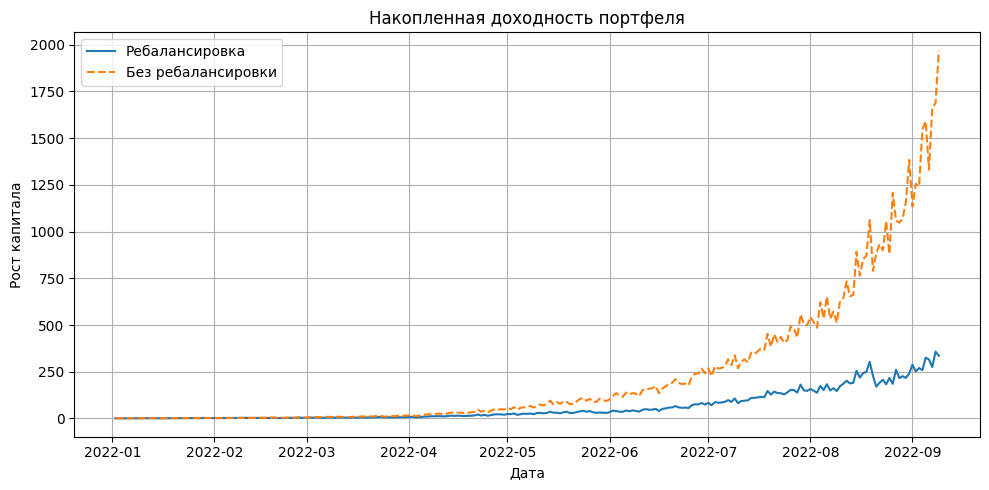

In [99]:
# 11. График накопленных доходностей (с одинаковым индексом времени)
common_index = returns.index[:min_len]
cumulative_rebalanced = pd.Series(np.cumprod(1 + rebalanced_returns), index=common_index)
cumulative_static = pd.Series(np.cumprod(1 + static_returns), index=common_index)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_rebalanced, label="Ребалансировка")
plt.plot(cumulative_static, label="Без ребалансировки", linestyle='--')
plt.title("Накопленная доходность портфеля")
plt.xlabel("Дата")
plt.ylabel("Рост капитала")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
pivot_df

AFKS   AFLT    ALRS    CBOM    CHMF    ENPG    GAZP    HYDR  \
begin                                                                       
2022-01-03  24.517  60.70  123.27   7.041  1619.8  918.00  353.73  0.7493   
2022-01-04  24.708  63.30  123.82   7.102  1603.4  915.50  352.55  0.7577   
2022-01-05  23.593  60.98  117.71   7.036  1575.2  896.00  335.00  0.7341   
2022-01-06  24.200  62.96  119.33   6.990  1584.0  930.00  346.13  0.7477   
2022-01-10  23.861  63.02  117.48   6.980  1554.6  946.50  344.00  0.7437   
...            ...    ...     ...     ...     ...     ...     ...     ...   
2024-12-25  14.155  54.86   52.96   9.772  1161.8  322.70  128.11  0.5025   
2024-12-26  14.087  55.04   54.00  10.020  1174.4  325.15  126.89  0.4984   
2024-12-27  14.278  55.65   54.69   9.916  1186.2  325.80  127.79  0.4996   
2024-12-28  14.738  58.38   56.42   9.943  1232.2  334.30  129.60  0.5052   
2024-12-30  15.594  59.06   57.86  10.247  1337.4  348.20  133.12  0.5206   

              IRAO    LKOH  ...    SBER   SBERP   SELG    SNGS   SNGSP   TATN  \
begin                       ...                                                 
2022-01-03  4.3850  6683.0  ...  305.47  289.74  57.98  39.600  38.870  515.4   
2022-01-04  4.4135  6728.0  ...  304.24  289.01  58.19  40.175  39.715  515.4   
2022-01-05  4.2340  6522.0  ...  287.01  274.80  57.74  38.750  39.075  492.6   
2022-01-06  4.2475  6699.0  ...  293.92  279.05  56.44  39.125  38.900  496.4   
2022-01-10  4.2940  6775.0  ...  291.69  277.80  55.02  39.290  38.955  499.8   
...            ...     ...  ...     ...     ...    ...     ...     ...    ...   
2024-12-25  3.7145  6987.5  ...  271.69  270.32  40.83  23.655  57.885  629.2   
2024-12-26  3.6590  7003.0  ...  269.56  269.25  40.23  24.000  58.515  630.9   
2024-12-27  3.6670  6990.5  ...  271.20  272.01  40.28  23.870  59.300  635.8   
2024-12-28  3.6750  6998.0  ...  272.83  273.50  40.79  24.115  59.105  652.4   
2024-12-30  3.7290  7235.0  ...  279.43  279.59  41.65  24.980  60.490  688.9   

            TATNP   TRNFP   UPRO     VTBR  
begin                                      
2022-01-03  472.1  1599.0  2.624  247.250  
2022-01-04  473.8  1601.0  2.645  248.500  
2022-01-05  453.0  1565.0  2.631  236.800  
2022-01-06  459.0  1600.0  2.617  242.225  
2022-01-10  460.0  1571.0  2.612  244.750  
...           ...     ...    ...      ...  
2024-12-25  628.5  1125.0  1.750   76.530  
2024-12-26  630.5  1126.5  1.727   75.740  
2024-12-27  633.0  1151.0  1.721   76.490  
2024-12-28  647.5  1232.0  1.752   78.090  
2024-12-30  680.3  1230.5  1.827   80.030  

[744 rows x 34 columns]

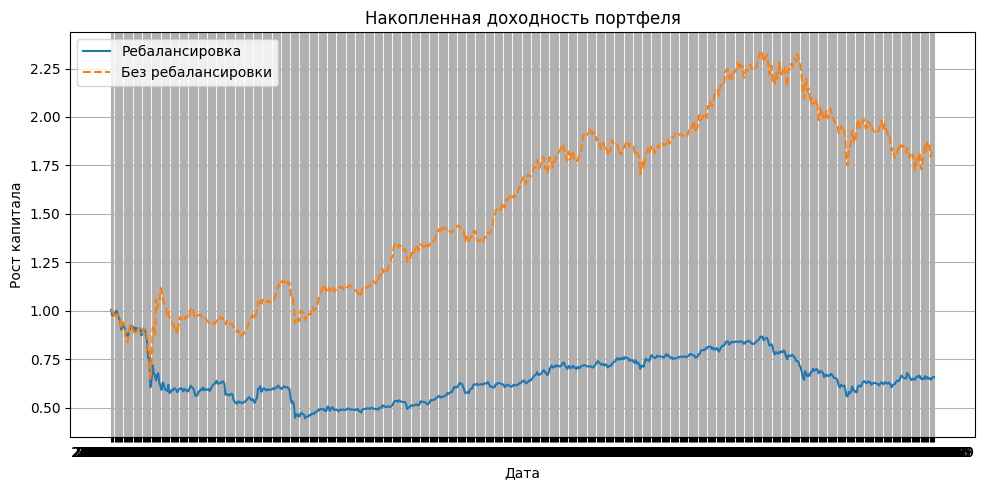

{'Total Transaction Cost (Rebalanced)': 0.6110242187122896,
 'Rebalanced Sharpe Ratio': -0.017584380769440286,
 'Static Sharpe Ratio': 0.047960839240556385,
 'Rebalanced Mean Return': -0.0003564349156461417,
 'Static Mean Return': 0.001055634020095259,
 'Rebalanced Volatility': 0.020269972558009337,
 'Static Volatility': 0.02201033252984863}

In [101]:

# 1. Подготовка данных
returns = pivot_df.pct_change().dropna()
tickers = returns.columns.tolist()
num_assets = len(tickers)
initial_weights = np.array(num_assets * [1. / num_assets])
commission = 0.01  # 1% комиссия
frequency = 21  # ежемесячная ребалансировка

# 2. Целевая функция
def penalized_neg_sharpe_ratio(weights, mean_returns, cov_matrix, prev_weights, commission=0.01, risk_free_rate=0.0):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    rebalancing_cost = commission * np.sum(np.abs(weights - prev_weights))
    return -sharpe_ratio + rebalancing_cost

# 3. Ребалансировка
weights_history = []
dates_history = []
prev_weights = initial_weights.copy()

for start in range(0, len(returns), frequency):
    end = start + frequency
    data_slice = returns.iloc[start:end]
    if len(data_slice) < frequency // 2:
        break

    mean_returns = data_slice.mean()
    cov_matrix = data_slice.cov()

    result = minimize(
        fun=penalized_neg_sharpe_ratio,
        x0=prev_weights,
        args=(mean_returns, cov_matrix, prev_weights, commission),
        method='SLSQP',
        bounds=tuple((0, 1) for _ in range(num_assets)),
        constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    )

    opt_weights = result.x
    weights_history.append(opt_weights)
    dates_history.append(data_slice.index[-1])
    prev_weights = opt_weights

weights_df = pd.DataFrame(weights_history, columns=tickers, index=dates_history)

# 4. Статичный портфель
mean_returns_full = returns.mean()
cov_matrix_full = returns.cov()

static_result = minimize(
    fun=penalized_neg_sharpe_ratio,
    x0=initial_weights,
    args=(mean_returns_full, cov_matrix_full, initial_weights, 0.0),
    method='SLSQP',
    bounds=tuple((0, 1) for _ in range(num_assets)),
    constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
)
static_weights = static_result.x

# 5. Доходности портфелей
def compute_portfolio_performance(weights_df, returns, frequency, commission=0.01):
    prev_weights = initial_weights.copy()
    total_cost = 0
    portfolio_returns = []

    for i, rebalance_date in enumerate(weights_df.index):
        start_idx = returns.index.get_loc(rebalance_date) - frequency + 1
        end_idx = returns.index.get_loc(rebalance_date)
        period_returns = returns.iloc[start_idx:end_idx + 1]

        weights = weights_df.iloc[i].values
        period_portfolio_returns = period_returns.dot(prev_weights)
        portfolio_returns.extend(period_portfolio_returns)

        transaction_cost = commission * np.sum(np.abs(weights - prev_weights))
        total_cost += transaction_cost

        prev_weights = weights

    return np.array(portfolio_returns), total_cost

rebalanced_returns, total_transaction_cost = compute_portfolio_performance(weights_df, returns, frequency, commission)
static_returns = returns.dot(static_weights)

# 6. Анализ
min_len = min(len(rebalanced_returns), len(static_returns))
rebalanced_returns = rebalanced_returns[:min_len]
static_returns = static_returns[:min_len]
common_index = returns.index[:min_len]

def metrics(arr):
    mean = np.mean(arr)
    vol = np.std(arr)
    sharpe = mean / vol
    return mean, vol, sharpe

reb_mean, reb_vol, reb_sharpe = metrics(rebalanced_returns)
stat_mean, stat_vol, stat_sharpe = metrics(static_returns)

# 7. График
cumulative_rebalanced = pd.Series(np.cumprod(1 + rebalanced_returns), index=common_index)
cumulative_static = pd.Series(np.cumprod(1 + static_returns), index=common_index)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_rebalanced, label="Ребалансировка")
plt.plot(cumulative_static, label="Без ребалансировки", linestyle='--')
plt.title("Накопленная доходность портфеля")
plt.xlabel("Дата")
plt.ylabel("Рост капитала")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Возврат итогов
{
    'Total Transaction Cost (Rebalanced)': total_transaction_cost,
    'Rebalanced Sharpe Ratio': reb_sharpe,
    'Static Sharpe Ratio': stat_sharpe,
    'Rebalanced Mean Return': reb_mean,
    'Static Mean Return': stat_mean,
    'Rebalanced Volatility': reb_vol,
    'Static Volatility': stat_vol
}


In [102]:
# Определим функцию, которая будет оценивать Sharpe Ratio для разных периодов ребалансировки
def evaluate_rebalancing_frequencies(returns, commission=0.01, max_frequency=60):
    results = []
    tickers = returns.columns.tolist()
    num_assets = len(tickers)
    initial_weights = np.array(num_assets * [1. / num_assets])
    
    def penalized_neg_sharpe_ratio(weights, mean_returns, cov_matrix, prev_weights, commission=0.01):
        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = port_return / port_volatility
        rebalancing_cost = commission * np.sum(np.abs(weights - prev_weights))
        return -sharpe_ratio + rebalancing_cost

    def compute_rebalanced_portfolio(frequency):
        prev_weights = initial_weights.copy()
        weights_history = []
        dates_history = []

        for start in range(0, len(returns), frequency):
            end = start + frequency
            data_slice = returns.iloc[start:end]
            if len(data_slice) < frequency // 2:
                break

            mean_returns = data_slice.mean()
            cov_matrix = data_slice.cov()

            result = minimize(
                fun=penalized_neg_sharpe_ratio,
                x0=prev_weights,
                args=(mean_returns, cov_matrix, prev_weights, commission),
                method='SLSQP',
                bounds=tuple((0, 1) for _ in range(num_assets)),
                constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
            )

            opt_weights = result.x
            weights_history.append(opt_weights)
            dates_history.append(data_slice.index[-1])
            prev_weights = opt_weights

        # Расчет доходностей
        portfolio_returns = []
        prev_weights = initial_weights.copy()
        total_cost = 0

        for i, rebalance_date in enumerate(dates_history):
            start_idx = returns.index.get_loc(rebalance_date) - frequency + 1
            end_idx = returns.index.get_loc(rebalance_date)
            period_returns = returns.iloc[start_idx:end_idx + 1]

            weights = weights_history[i]
            period_portfolio_returns = period_returns.dot(prev_weights)
            portfolio_returns.extend(period_portfolio_returns)

            transaction_cost = commission * np.sum(np.abs(weights - prev_weights))
            total_cost += transaction_cost

            prev_weights = weights

        if len(portfolio_returns) < 2:
            return None

        port_returns = np.array(portfolio_returns)
        mean = np.mean(port_returns)
        vol = np.std(port_returns)
        sharpe = mean / vol if vol > 0 else -np.inf
        return sharpe, total_cost

    for freq in range(1, max_frequency + 1, 2):
        result = compute_rebalanced_portfolio(freq)
        if result:
            sharpe, cost = result
            results.append((freq, sharpe, cost))

    return pd.DataFrame(results, columns=["Frequency", "Sharpe Ratio", "Total Cost"]).set_index("Frequency")

# Применим к нашему датасету
sharpe_by_freq = evaluate_rebalancing_frequencies(returns, commission=0.01, max_frequency=60)
sharpe_by_freq

C:\PerfLogs\Lib\site-packages\pandas\core\frame.py:10217: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\PerfLogs\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\PerfLogs\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Sharpe Ratio  Total Cost
Frequency                          
1              0.002793    0.000000
3              0.059695    4.567459
5             -0.009706    2.670043
7              0.002801    1.925986
9              0.002683    1.497329
11             0.044750    1.221215
13             0.013379    1.013354
15             0.007848    0.884885
17             0.015454    0.797149
19             0.048882    0.676645
21            -0.017584    0.611024
23            -0.002998    0.547896
25             0.000984    0.520966
27             0.045021    0.492517
29             0.014824    0.474425
31             0.006557    0.417946
33             0.040741    0.412879
35            -0.012054    0.388647
37             0.042500    0.347583
39             0.007928    0.349155
41            -0.025783    0.332503
43            -0.010232    0.318892
45             0.017639    0.305793
47             0.002382    0.298935
49             0.005653    0.260437
51             0.009348    0.262329
53            -0.000846    0.233494
55            -0.011552    0.259051
57             0.004696    0.224495
59             0.003026    0.233029

In [ ]:
# Для наглядности отберем только активы, которые хоть раз имели значимую долю (например, > 5%)
significant_assets = weights_df.columns[(weights_df > 0.05).any()]
filtered_weights_df = weights_df[significant_assets]

# Визуализация динамики структуры портфеля (stacked area chart)
plt.figure(figsize=(14, 6))
filtered_weights_df.plot.area(stacked=True, figsize=(14, 6), cmap='tab20')
plt.title("Динамика структуры портфеля (значимые активы)")
plt.ylabel("Доля в портфеле")
plt.xlabel("Дата ребалансировки")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Загрузка данных
df = pd.read_csv('pivot_df.csv', parse_dates=['begin'], index_col='begin')

# Расчет логарифмических доходностей
returns = np.log(df / df.shift(1)).dropna()

# Ожидаемая доходность и ковариационная матрица
expected_returns = returns.mean() * 252  # Годовая доходность
cov_matrix = returns.cov() * 252         # Годовая ковариация

# Параметры оптимизации
num_assets = len(expected_returns)
args = (expected_returns, cov_matrix)

# Целевая функция (минимизация риска)
def portfolio_volatility(weights, returns, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Ограничения и условия

bounds = tuple((0, 1) for _ in range(num_assets))              # Длинные позиции
target_return = 0.10  # Пример целевой доходности

constraints = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
    {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns) - target_return}
)
# Оптимизация
result = minimize(
    portfolio_volatility,
    x0=np.ones(num_assets) / num_assets,
    args=args,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Веса оптимального портфеля
optimal_weights = result.x

In [ ]:
# Вывод весов
for ticker, weight in zip(df.columns, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Загрузка данных
df = pd.read_csv('pivot_df.csv', parse_dates=['begin'], index_col='begin')

# Параметры бэктеста
train_window = 180  # Окно обучения (дней)
rebalance_freq = 21  # Частота ребалансировки (дней)
risk_free_rate = 0.05  # Безрисковая ставка (годовая)

# Расчет логарифмических доходностей
returns = np.log(df / df.shift(1)).dropna()

# Инициализация переменных
portfolio_returns = []
benchmark_returns = []  # Равновзвешенный портфель
dates = []

# Цикл бэктеста
for i in range(train_window, len(returns), rebalance_freq):
    # Выделяем окно обучения
    train_data = returns.iloc[i-train_window:i]
    
    # Рассчитываем параметры
    er = train_data.mean() * 252
    cov = train_data.cov() * 252
    
    # Оптимизация портфеля
    def objective(weights):
        return np.sqrt(weights.T @ cov @ weights)
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, er) - er.mean()}
    )
    
    result = minimize(
        objective,
        x0=np.ones(len(er))/len(er),
        method='SLSQP',
        bounds=[(0, 1) for _ in er],
        constraints=constraints
    )
    
    # Веса портфеля
    weights = result.x
    
    # Тестовый период
    test_data = returns.iloc[i:i+rebalance_freq]
    
    # Доходность портфеля
    portf_return = (test_data * weights).sum(axis=1)
    portfolio_returns.extend(portf_return)
    
    # Доходность бенчмарка
    benchmark_return = test_data.mean(axis=1)
    benchmark_returns.extend(benchmark_return)
    
    # Даты для графиков
    dates.extend(test_data.index)

# Конвертируем в Series
portfolio_series = pd.Series(portfolio_returns, index=dates)
benchmark_series = pd.Series(benchmark_returns, index=dates)

# Кумулятивная доходность
cumulative_portf = (1 + portfolio_series).cumprod()
cumulative_bench = (1 + benchmark_series).cumprod()

# Рассчет показателей
def annualized_sharpe(returns):
    excess_returns = returns - risk_free_rate/252
    return np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f"Portfolio Sharpe: {annualized_sharpe(portfolio_series):.2f}")
print(f"Benchmark Sharpe: {annualized_sharpe(benchmark_series):.2f}")

# Визуализация
plt.figure(figsize=(12,6))
cumulative_portf.plot(label='Optimized Portfolio')
cumulative_bench.plot(label='Equal-Weight Benchmark')
plt.title('Backtest Results')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from itertools import product
import matplotlib.pyplot as plt

class PortfolioOptimizer:
    def __init__(self, data, risk_free_rate=0.05):
        self.data = data
        self.returns = np.log(data / data.shift(1)).dropna()
        self.risk_free_rate = risk_free_rate
        self.results = {}
        
    def calculate_metrics(self, returns):
        cumulative = (1 + returns).cumprod()
        peak = cumulative.expanding(min_periods=1).max()
        drawdown = (cumulative - peak) / peak
        max_drawdown = drawdown.min()
        
        excess_returns = returns - self.risk_free_rate/252
        downside_returns = returns[returns < 0]
        
        sharpe = np.sqrt(252) * excess_returns.mean() / returns.std()
        sortino = np.sqrt(252) * excess_returns.mean() / downside_returns.std()
        
        return {
            'sharpe': sharpe,
            'sortino': sortino,
            'max_drawdown': max_drawdown,
            'cagr': (cumulative[-1] ** (252/len(returns))) - 1
        }

    def optimize_portfolio(self, returns, cov_matrix, target_return=None, objective='sharpe'):
        n = len(returns)
        bounds = [(0, 1) for _ in range(n)]
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        
        if target_return is not None:
            constraints.append(
                {'type': 'eq', 'fun': lambda x: np.dot(x, returns) - target_return}
            )
            
        if objective == 'sharpe':
            def obj_func(weights):
                port_return = np.dot(weights, returns)
                port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
                return -port_return / port_vol
        elif objective == 'sortino':
            def obj_func(weights):
                port_returns = self.returns @ weights
                downside_vol = port_returns[port_returns < 0].std() * np.sqrt(252)
                return -np.mean(port_returns) / downside_vol
        else:
            def obj_func(weights):
                return np.sqrt(weights.T @ cov_matrix @ weights)
            
        result = minimize(
            obj_func,
            x0=np.ones(n)/n,
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )
        return result.x

    def backtest(self, train_window=180, rebalance_freq=21, 
                 commission=0.001, strategy='periodic', 
                 threshold=0.05, objective='sharpe'):
        
        portfolio = []
        benchmark = []
        prev_weights = None
        dates = []
        
        for i in range(train_window, len(self.returns), rebalance_freq):
            # Train data
            train_returns = self.returns.iloc[i-train_window:i]
            er = train_returns.mean() * 252
            cov = train_returns.cov() * 252
            
            # Optimize weights
            weights = self.optimize_portfolio(er, cov, objective=objective)
            
            # Apply commission
            if prev_weights is not None:
                turnover = np.abs(weights - prev_weights).sum()
                commission_cost = turnover * commission
                weights -= commission_cost * weights / weights.sum()
                
            prev_weights = weights.copy()
            
            # Test period returns
            test_returns = self.returns.iloc[i:i+rebalance_freq]
            portf_returns = test_returns @ weights
            bench_returns = test_returns.mean(axis=1)
            
            # Handle threshold rebalancing
            if strategy == 'threshold':
                for j in range(1, len(test_returns)):
                    current_weights = weights * (1 + test_returns.iloc[:j].sum())
                    current_weights /= current_weights.sum()
                    if np.any(np.abs(current_weights - weights) > threshold):
                        # Rebalance
                        weights = self.optimize_portfolio(er, cov, objective=objective)
                        portf_returns.iloc[j:] = test_returns.iloc[j:] @ weights
                        break
                        
            portfolio.extend(portf_returns)
            benchmark.extend(bench_returns)
            dates.extend(test_returns.index)
            
        return pd.Series(portfolio, index=dates), pd.Series(benchmark, index=dates)

    def parameter_grid_search(self, train_windows=[120, 180, 252], 
                             rebalance_freqs=[21, 63], objectives=['sharpe']):
        best_params = None
        best_sharpe = -np.inf
        
        for window, freq, obj in product(train_windows, rebalance_freqs, objectives):
            portf, bench = self.backtest(
                train_window=window,
                rebalance_freq=freq,
                objective=obj
            )
            metrics = self.calculate_metrics(portf)
            
            if metrics['sharpe'] > best_sharpe:
                best_sharpe = metrics['sharpe']
                best_params = {
                    'window': window,
                    'freq': freq,
                    'objective': obj,
                    'metrics': metrics
                }
                
        return best_params

    def plot_results(self, portfolio, benchmark):
        cum_portf = (1 + portfolio).cumprod()
        cum_bench = (1 + benchmark).cumprod()
        
        plt.figure(figsize=(12,6))
        cum_portf.plot(label='Optimized Portfolio')
        cum_bench.plot(label='Benchmark')
        plt.title('Backtest Results')
        plt.ylabel('Cumulative Return')
        plt.xlabel('Date')
        plt.legend()
        plt.grid(True)
        plt.show()

# Usage example
if __name__ == "__main__":
    # Load data
    df = pd.read_csv('pivot_df.csv', parse_dates=['begin'], index_col='begin')
    
    # Initialize optimizer
    optimizer = PortfolioOptimizer(df)
    
    # Parameter optimization
    best_params = optimizer.parameter_grid_search()
    print("Best Parameters:", best_params)
    
    # Run backtest with best parameters
    portf, bench = optimizer.backtest(
        train_window=best_params['window'],
        rebalance_freq=best_params['freq'],
        objective=best_params['objective']
    )
    
    # Calculate and print metrics
    metrics = optimizer.calculate_metrics(portf)
    print("\nPortfolio Metrics:")
    for k, v in metrics.items():
        print(f"{k.upper():<15} {v:.2f}")
    
    # Plot results
    optimizer.plot_results(portf, bench)

# ПРОГНОЗ

In [89]:
import numpy as np

# 1. Агрегируем до недельных данных (берем последнюю цену на неделе)
weekly_prices = pivot_df.resample('W').last()

# 2. Расчет доходности
weekly_returns = weekly_prices.pct_change().dropna()

# 3. Построим лаги и целевую переменную (доходность через 4 недели)
horizon = 4  # 4 недели вперёд
lags = 5     # количество лагов

features = []
targets = []

for asset in weekly_returns.columns:
    asset_df = weekly_returns[[asset]].copy()
    
    # добавляем лаги
    for lag in range(1, lags + 1):
        asset_df[f'{asset}_lag_{lag}'] = asset_df[asset].shift(lag)
    
    # целевая переменная — доходность через `horizon` недель
    asset_df[f'{asset}_target'] = weekly_returns[asset].shift(-horizon)
    
    features.append(asset_df)

# Объединим все активы в одну таблицу
full_df = pd.concat(features, axis=1)

# Удалим строки с пропущенными значениями
clean_df = full_df.dropna()

clean_df.shape


(5, 329)

In [90]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Отделим последнюю неделю для прогноза
train_df = clean_df.iloc[:-1]
predict_df = clean_df.iloc[-1:]

# Выделим X (признаки) и y (целевые значения)
X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]

X_pred = predict_df[X_train.columns]

# Обучим модели и получим прогнозы
rf_preds = {}
xgb_preds = {}

for asset in weekly_returns.columns:
    target_col = f'{asset}_target'
    feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
    
    if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
        X_train_asset = X_train[feature_cols]
        y_train_asset = y_train[target_col]
        X_pred_asset = X_pred[feature_cols]

        # RandomForest
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train_asset, y_train_asset)
        rf_preds[asset] = rf.predict(X_pred_asset)[0]
        
        # XGBoost
        xgb = XGBRegressor(random_state=42)
        xgb.fit(X_train_asset, y_train_asset)
        xgb_preds[asset] = xgb.predict(X_pred_asset)[0]

rf_preds = pd.Series(rf_preds)
xgb_preds = pd.Series(xgb_preds)

rf_preds.head(), xgb_preds.head()


(AFKS    0.009802
 AFLT   -0.002761
 ALRS    0.037536
 ASTR   -0.024974
 BSPB    0.010984
 dtype: float64,
 AFKS   -0.022822
 AFLT   -0.024711
 ALRS   -0.001653
 ASTR   -0.019776
 BSPB    0.010821
 dtype: float32)

In [91]:
# Создадим класс MLPortfolioOptimizer, расширяющий PortfolioOptimizer с использованием ML-прогнозов
class MLPortfolioOptimizer:
    def __init__(self, price_data, lags=5, horizon=4, model_type='random_forest'):
        self.price_data = price_data
        self.weekly_prices = price_data.resample('W').last()
        self.weekly_returns = self.weekly_prices.pct_change().dropna()
        self.lags = lags
        self.horizon = horizon
        self.model_type = model_type.lower()

    def build_features(self):
        features = []
        for asset in self.weekly_returns.columns:
            df = self.weekly_returns[[asset]].copy()
            for lag in range(1, self.lags + 1):
                df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
            df[f'{asset}_target'] = self.weekly_returns[asset].shift(-self.horizon)
            features.append(df)
        full_df = pd.concat(features, axis=1)
        return full_df.dropna()

    def train_predict(self, feature_df):
        train_df = feature_df.iloc[:-1]
        predict_df = feature_df.iloc[-1:]

        X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
        y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
        X_pred = predict_df[X_train.columns]

        predictions = {}
        for asset in self.weekly_returns.columns:
            target_col = f'{asset}_target'
            feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]

            if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                X_train_asset = X_train[feature_cols]
                y_train_asset = y_train[target_col]
                X_pred_asset = X_pred[feature_cols]

                if self.model_type == 'random_forest':
                    model = RandomForestRegressor(random_state=42, n_estimators=100)
                elif self.model_type == 'xgboost':
                    model = XGBRegressor(random_state=42, n_estimators=50, verbosity=0)
                else:
                    raise ValueError("Unsupported model type. Use 'random_forest' or 'xgboost'.")

                model.fit(X_train_asset, y_train_asset)
                predictions[asset] = model.predict(X_pred_asset)[0]

        return pd.Series(predictions)

    def optimize_weights(self, expected_returns):
        common_assets = list(set(expected_returns.index) & set(self.weekly_returns.columns))
        recent_returns = self.weekly_returns[common_assets].iloc[-52:]
        cov_matrix = recent_returns.cov()
        expected_returns = expected_returns[common_assets]

        n = len(expected_returns)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

        def neg_sharpe(weights):
            port_return = np.dot(weights, expected_returns.values)
            port_vol = np.sqrt(weights @ cov_matrix.values @ weights.T)
            return -port_return / port_vol

        result = minimize(
            neg_sharpe,
            x0=np.ones(n) / n,
            bounds=bounds,
            constraints=constraints
        )
        return pd.Series(result.x, index=expected_returns.index)

# Инициализация и запуск
ml_optimizer = MLPortfolioOptimizer(df, model_type='random_forest')
feature_df = ml_optimizer.build_features()
predicted_returns = ml_optimizer.train_predict(feature_df)
ml_weights = ml_optimizer.optimize_weights(predicted_returns)
ml_weights.sort_values(ascending=False).head(10)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

TypeError: no numeric data to plot

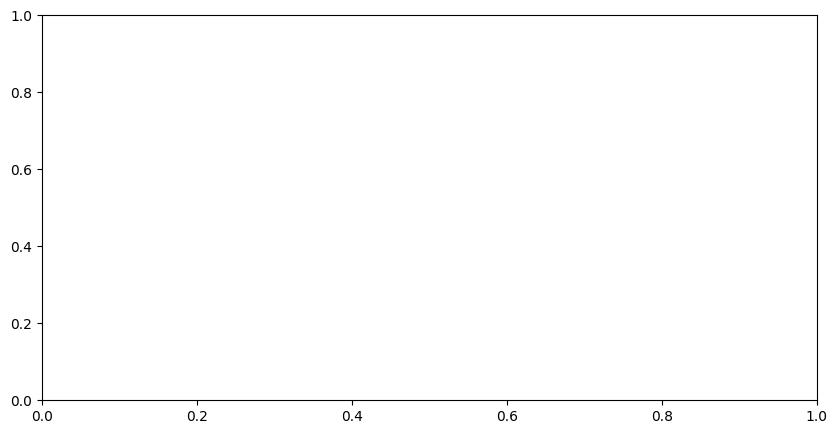

In [87]:
# Повторно реализуем бэктест с оптимизациями:
# - уменьшим количество деревьев
# - увеличим шаг ребалансировки
# - сохраним использование всех бумаг

class FastMLPortfolioBacktester(MLPortfolioOptimizer):
    def backtest(self, window=52, step=4):
        portfolio_returns = []
        dates = []

        feature_df = self.build_features()
        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            # Подготовка X и y
            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            preds = {}
            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]

                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]

                    model = RandomForestRegressor(random_state=42, n_estimators=20)
                    model.fit(X_train_asset, y_train_asset)
                    preds[asset] = model.predict(X_pred_asset)[0]

            preds = pd.Series(preds).dropna()
            if len(preds) < 2:
                continue

            weights = self.optimize_weights(preds)

            # Доходность портфеля на горизонте self.horizon недель вперёд
            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            actual_returns = future_returns.mean()
            actual_returns = actual_returns[weights.index].dropna()
            weights = weights[actual_returns.index]
            portf_return = np.dot(weights, actual_returns)

            portfolio_returns.append(portf_return)
            dates.append(date)

        return pd.Series(portfolio_returns, index=dates)

# Запуск ускоренного бэктеста
fast_backtester = FastMLPortfolioBacktester(df, model_type='random_forest')
ml_portfolio_series = fast_backtester.backtest()

# Построим график
import matplotlib.pyplot as plt

cum_returns = (1 + ml_portfolio_series).cumprod()
plt.figure(figsize=(10, 5))
cum_returns.plot(title="ML Portfolio Backtest (Random Forest, All Assets)")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()


TypeError: no numeric data to plot

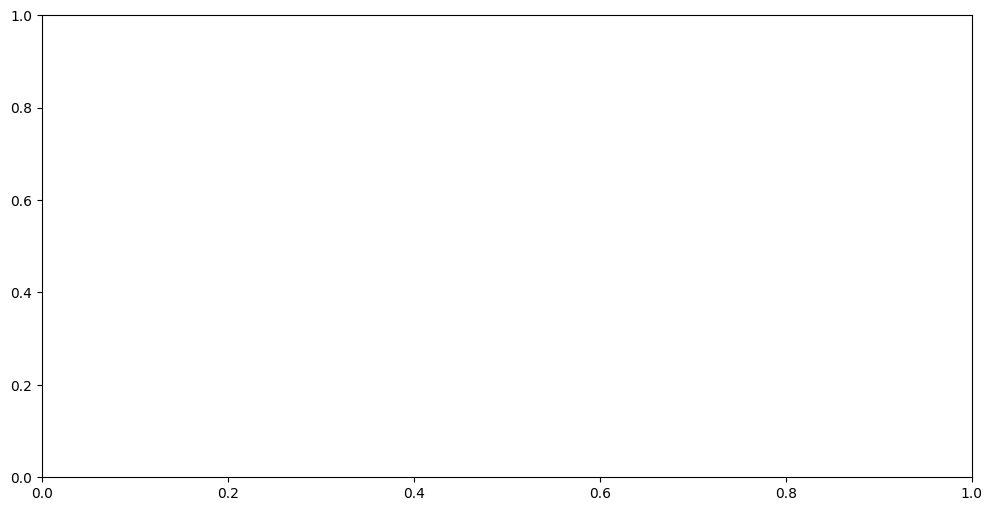

In [83]:
class FastComparisonBacktester:
    def __init__(self, price_data, lags=5, horizon=4):
        self.price_data = price_data
        self.weekly_prices = price_data.resample('W').last()
        self.weekly_returns = self.weekly_prices.pct_change().dropna()
        self.lags = lags
        self.horizon = horizon

    def build_features(self):
        features = []
        for asset in self.weekly_returns.columns:
            df = self.weekly_returns[[asset]].copy()
            for lag in range(1, self.lags + 1):
                df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
            df[f'{asset}_target'] = self.weekly_returns[asset].shift(-self.horizon)
            features.append(df)
        full_df = pd.concat(features, axis=1)
        return full_df.dropna()

    def optimize_weights(self, expected_returns):
        common_assets = list(set(expected_returns.index) & set(self.weekly_returns.columns))
        recent_returns = self.weekly_returns[common_assets].iloc[-52:]
        cov_matrix = recent_returns.cov()
        expected_returns = expected_returns[common_assets]

        n = len(expected_returns)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

        def neg_sharpe(weights):
            port_return = np.dot(weights, expected_returns.values)
            port_vol = np.sqrt(weights @ cov_matrix.values @ weights.T)
            return -port_return / port_vol

        result = minimize(
            neg_sharpe,
            x0=np.ones(n) / n,
            bounds=bounds,
            constraints=constraints
        )
        return pd.Series(result.x, index=expected_returns.index)

    def min_risk_weights(self, cov_matrix):
        n = len(cov_matrix)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        def port_vol(weights):
            return np.sqrt(weights @ cov_matrix.values @ weights.T)
        result = minimize(port_vol, x0=np.ones(n)/n, bounds=bounds, constraints=constraints)
        return pd.Series(result.x, index=cov_matrix.columns)

    def backtest(self, window=52, step=4):
        rf_returns, min_risk_returns, benchmark_returns = [], [], []
        dates = []
        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            rf_preds = {}

            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]

                    rf = RandomForestRegressor(random_state=42, n_estimators=20)
                    rf.fit(X_train_asset, y_train_asset)
                    rf_preds[asset] = rf.predict(X_pred_asset)[0]

            rf_preds = pd.Series(rf_preds).dropna()
            if len(rf_preds) < 2:
                continue

            rf_weights = self.optimize_weights(rf_preds)

            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()

            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])

            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            rf_weights = rf_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[rf_weights.index]

            rf_returns.append(np.dot(rf_weights, avg_future_returns))
            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns))
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))
            dates.append(date)

        return (
            pd.Series(rf_returns, index=dates, name="RandomForest"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark")
        )

# Запуск и визуализация
fast_backtester = FastComparisonBacktester(df)
rf_series, min_risk_series, benchmark_series = fast_backtester.backtest()

plt.figure(figsize=(12, 6))
(1 + rf_series).cumprod().plot(label='Random Forest')
(1 + min_risk_series).cumprod().plot(label='Min Risk')
(1 + benchmark_series).cumprod().plot(label='Benchmark')
plt.title("Сравнение стратегий: Random Forest, минимум риска, бенчмарк")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.show()


In [84]:
# Повторно импортируем и запускаем backtester с сохранением весов
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import minimize

class FastComparisonBacktesterWithWeights:
    def __init__(self, price_data, lags=5, horizon=4):
        self.price_data = price_data
        self.weekly_prices = price_data.resample('W').last()
        self.weekly_returns = self.weekly_prices.pct_change().dropna()
        self.lags = lags
        self.horizon = horizon

    def build_features(self):
        features = []
        for asset in self.weekly_returns.columns:
            df = self.weekly_returns[[asset]].copy()
            for lag in range(1, self.lags + 1):
                df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
            df[f'{asset}_target'] = self.weekly_returns[asset].shift(-self.horizon)
            features.append(df)
        full_df = pd.concat(features, axis=1)
        return full_df.dropna()

    def optimize_weights(self, expected_returns):
        common_assets = list(set(expected_returns.index) & set(self.weekly_returns.columns))
        recent_returns = self.weekly_returns[common_assets].iloc[-52:]
        cov_matrix = recent_returns.cov()
        expected_returns = expected_returns[common_assets]

        n = len(expected_returns)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

        def neg_sharpe(weights):
            port_return = np.dot(weights, expected_returns.values)
            port_vol = np.sqrt(weights @ cov_matrix.values @ weights.T)
            return -port_return / port_vol

        result = minimize(
            neg_sharpe,
            x0=np.ones(n) / n,
            bounds=bounds,
            constraints=constraints
        )
        return pd.Series(result.x, index=expected_returns.index)

    def min_risk_weights(self, cov_matrix):
        n = len(cov_matrix)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        def port_vol(weights):
            return np.sqrt(weights @ cov_matrix.values @ weights.T)
        result = minimize(port_vol, x0=np.ones(n)/n, bounds=bounds, constraints=constraints)
        return pd.Series(result.x, index=cov_matrix.columns)

    def backtest(self, window=52, step=4):
        rf_returns, min_risk_returns, benchmark_returns = [], [], []
        rf_weights_all = {}
        dates = []
        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            rf_preds = {}

            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]

                    rf = RandomForestRegressor(random_state=42, n_estimators=20)
                    rf.fit(X_train_asset, y_train_asset)
                    rf_preds[asset] = rf.predict(X_pred_asset)[0]

            rf_preds = pd.Series(rf_preds).dropna()
            if len(rf_preds) < 2:
                continue

            rf_weights = self.optimize_weights(rf_preds)
            rf_weights_all[date] = rf_weights

            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()

            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])

            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            rf_weights = rf_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[rf_weights.index]

            rf_returns.append(np.dot(rf_weights, avg_future_returns))
            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns))
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))
            dates.append(date)

        weights_df = pd.DataFrame(rf_weights_all).T.sort_index()
        return (
            pd.Series(rf_returns, index=dates, name="RandomForest"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark"),
            weights_df
        )

# Запуск
backtester = FastComparisonBacktesterWithWeights(df)
rf_series, min_risk_series, benchmark_series, rf_weights_df = backtester.backtest()

# Покажем веса портфеля
rf_weights_df.head()

Empty DataFrame
Columns: []
Index: []

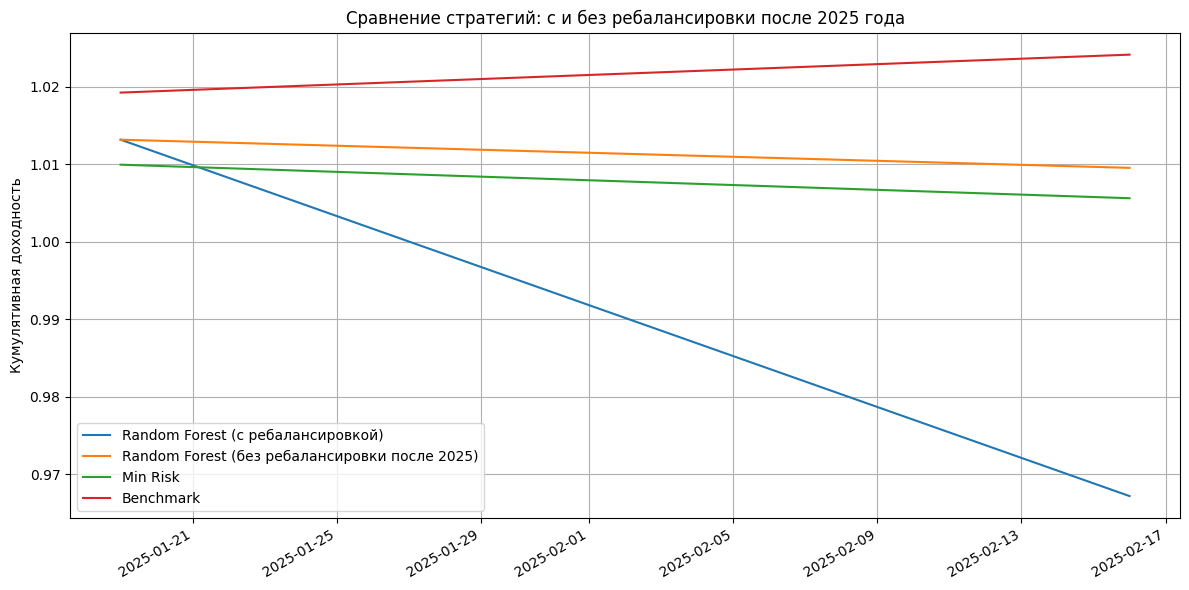

In [86]:
# Импортируем всё необходимое
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Функция для объединения датасетов
def load_and_combine_datasets(path1, path2):
    df1 = pd.read_csv(path1, parse_dates=['begin'], index_col='begin')
    df2 = pd.read_csv(path2, parse_dates=['begin'], index_col='begin')
    common_cols = list(set(df1.columns) & set(df2.columns))
    df1 = df1[common_cols]
    df2 = df2[common_cols]
    combined = pd.concat([df1, df2])
    combined = combined[~combined.index.duplicated()].sort_index()
    return combined

# Расширенный класс с поддержкой отключения ребалансировки после определённой даты
class ExtendedComparisonBacktester:
    def __init__(self, price_data, lags=5, horizon=4, no_rebalance_after=None):
        self.price_data = price_data
        self.weekly_prices = price_data.resample('W').last()
        self.weekly_returns = self.weekly_prices.pct_change().dropna()
        self.lags = lags
        self.horizon = horizon
        self.no_rebalance_after = no_rebalance_after

    def build_features(self):
        features = []
        for asset in self.weekly_returns.columns:
            df = self.weekly_returns[[asset]].copy()
            for lag in range(1, self.lags + 1):
                df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
            df[f'{asset}_target'] = self.weekly_returns[asset].shift(-self.horizon)
            features.append(df)
        full_df = pd.concat(features, axis=1)
        return full_df.dropna()

    def optimize_weights(self, expected_returns):
        common_assets = list(set(expected_returns.index) & set(self.weekly_returns.columns))
        recent_returns = self.weekly_returns[common_assets].iloc[-52:]
        cov_matrix = recent_returns.cov()
        expected_returns = expected_returns[common_assets]

        n = len(expected_returns)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

        def neg_sharpe(weights):
            port_return = np.dot(weights, expected_returns.values)
            port_vol = np.sqrt(weights @ cov_matrix.values @ weights.T)
            return -port_return / port_vol

        result = minimize(
            neg_sharpe,
            x0=np.ones(n) / n,
            bounds=bounds,
            constraints=constraints
        )
        return pd.Series(result.x, index=expected_returns.index)

    def min_risk_weights(self, cov_matrix):
        n = len(cov_matrix)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        def port_vol(weights):
            return np.sqrt(weights @ cov_matrix.values @ weights.T)
        result = minimize(port_vol, x0=np.ones(n)/n, bounds=bounds, constraints=constraints)
        return pd.Series(result.x, index=cov_matrix.columns)

    def backtest(self, window=52, step=4):
        rf_returns, rf_no_rebal_returns, min_risk_returns, benchmark_returns = [], [], [], []
        dates = []
        rf_weights = None  # для хранения текущих весов (с ребалансировкой)
        rf_static_weights = None  # фиксированные веса с конца 2024
        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            rf_preds = {}
            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]

                    rf = RandomForestRegressor(random_state=42, n_estimators=20)
                    rf.fit(X_train_asset, y_train_asset)
                    rf_preds[asset] = rf.predict(X_pred_asset)[0]

            rf_preds = pd.Series(rf_preds).dropna()
            if len(rf_preds) < 2:
                continue

            # обновляем веса RF
            rf_weights = self.optimize_weights(rf_preds)

            # зафиксируем веса в конце 2024
            if self.no_rebalance_after and rf_static_weights is None and date >= self.no_rebalance_after:
                rf_static_weights = rf_weights.copy()

            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()

            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])

            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            rf_weights = rf_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[rf_weights.index]

            # накопленные доходности
            rf_returns.append(np.dot(rf_weights, avg_future_returns))

            if self.no_rebalance_after and date >= self.no_rebalance_after and rf_static_weights is not None:
                static_weights = rf_static_weights[avg_future_returns.index].dropna()
                rf_no_rebal_returns.append(np.dot(static_weights, avg_future_returns))
            else:
                rf_no_rebal_returns.append(np.dot(rf_weights, avg_future_returns))

            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns))
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))
            dates.append(date)

        return (
            pd.Series(rf_returns, index=dates, name="RandomForest"),
            pd.Series(rf_no_rebal_returns, index=dates, name="RF_No_Rebalance_After_2025"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark")
        )

# Запуск объединения и расчёта
combined_df = load_and_combine_datasets("pivot_df.csv", "pivot_df2.csv")
backtester = ExtendedComparisonBacktester(combined_df, no_rebalance_after=pd.Timestamp("2025-01-01"))
rf_series, rf_static_series, min_risk_series, benchmark_series = backtester.backtest()

# Построим график
plt.figure(figsize=(12, 6))
(1 + rf_series).cumprod().plot(label='Random Forest (с ребалансировкой)')
(1 + rf_static_series).cumprod().plot(label='Random Forest (без ребалансировки после 2025)')
(1 + min_risk_series).cumprod().plot(label='Min Risk')
(1 + benchmark_series).cumprod().plot(label='Benchmark')
plt.title("Сравнение стратегий: с и без ребалансировки после 2025 года")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# МЕТРИКИ

In [ ]:
# Вычислим метрики по всем стратегиям
def calculate_metrics(returns):
    mean_ret = returns.mean() * 52
    std_ret = returns.std() * (52 ** 0.5)
    sharpe = mean_ret / std_ret if std_ret != 0 else np.nan
    return {
        'Mean Return': mean_ret,
        'Volatility': std_ret,
        'Sharpe Ratio': sharpe
    }

metrics = {
    "Random Forest (ребалансировка)": calculate_metrics(rf_series),
    "Random Forest (фикс. веса с 2025)": calculate_metrics(rf_static_series),
    "Min Risk": calculate_metrics(min_risk_series),
    "Benchmark": calculate_metrics(benchmark_series),
}

metrics_df = pd.DataFrame(metrics).T

# Сохраним также веса на конец 2024 года
cutoff_date = pd.Timestamp("2025-01-01")
rf_weights_end_2024 = None
feature_df = combined_df.resample('W').last().pct_change().dropna()

# Найдём последнюю дату перед cutoff_date из серии стратегий
last_date_before_2025 = rf_static_series[rf_static_series.index < cutoff_date].index.max()

# Найдём соответствующие веса из оптимизации
# Придётся восстановить веса через переобучение на дату last_date_before_2025
backtester_for_weights = ExtendedComparisonBacktester(combined_df)
feature_df = backtester_for_weights.build_features()
window = 52
i = list(feature_df.index).index(last_date_before_2025)
train_df = feature_df.iloc[i - window:i]
predict_df = feature_df.iloc[i:i + 1]

X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
X_pred = predict_df[X_train.columns]

rf_preds = {}
for asset in backtester_for_weights.weekly_returns.columns:
    target_col = f'{asset}_target'
    feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
    if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
        X_train_asset = X_train[feature_cols]
        y_train_asset = y_train[target_col]
        X_pred_asset = X_pred[feature_cols]
        rf = RandomForestRegressor(random_state=42, n_estimators=20)
        rf.fit(X_train_asset, y_train_asset)
        rf_preds[asset] = rf.predict(X_pred_asset)[0]

rf_preds = pd.Series(rf_preds).dropna()
rf_weights_end_2024 = backtester_for_weights.optimize_weights(rf_preds)

# Покажем метрики и веса
metrics_df

# XGBOOST

In [ ]:
from xgboost import XGBRegressor

# Класс с XGBoost вместо RandomForest
class ExtendedXGBoostBacktester(ExtendedComparisonBacktester):
    def backtest(self, window=52, step=4):
        xgb_returns, xgb_static_returns, min_risk_returns, benchmark_returns = [], [], [], []
        dates = []
        xgb_weights = None
        xgb_static_weights = None
        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            xgb_preds = {}
            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]
                    xgb = XGBRegressor(random_state=42, n_estimators=20, verbosity=0)
                    xgb.fit(X_train_asset, y_train_asset)
                    xgb_preds[asset] = xgb.predict(X_pred_asset)[0]

            xgb_preds = pd.Series(xgb_preds).dropna()
            if len(xgb_preds) < 2:
                continue

            xgb_weights = self.optimize_weights(xgb_preds)

            if self.no_rebalance_after and xgb_static_weights is None and date >= self.no_rebalance_after:
                xgb_static_weights = xgb_weights.copy()

            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()

            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])

            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            xgb_weights = xgb_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[xgb_weights.index]

            xgb_returns.append(np.dot(xgb_weights, avg_future_returns))

            if self.no_rebalance_after and date >= self.no_rebalance_after and xgb_static_weights is not None:
                static_weights = xgb_static_weights[avg_future_returns.index].dropna()
                xgb_static_returns.append(np.dot(static_weights, avg_future_returns))
            else:
                xgb_static_returns.append(np.dot(xgb_weights, avg_future_returns))

            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns))
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))
            dates.append(date)

        return (
            pd.Series(xgb_returns, index=dates, name="XGBoost"),
            pd.Series(xgb_static_returns, index=dates, name="XGBoost_No_Rebalance_After_2025"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark")
        )

# Запуск XGBoost стратегии
xgb_backtester = ExtendedXGBoostBacktester(combined_df, no_rebalance_after=pd.Timestamp("2025-01-01"))
xgb_series, xgb_static_series, min_risk_xgb, benchmark_xgb = xgb_backtester.backtest()

# Построим график
plt.figure(figsize=(12, 6))
(1 + xgb_series).cumprod().plot(label='XGBoost (ребалансировка)')
(1 + xgb_static_series).cumprod().plot(label='XGBoost (без ребалансировки после 2025)')
(1 + min_risk_xgb).cumprod().plot(label='Min Risk')
(1 + benchmark_xgb).cumprod().plot(label='Benchmark')
plt.title("Сравнение стратегий XGBoost: с и без ребалансировки после 2025")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Повторно определим функцию расчёта метрик
def calculate_metrics(returns):
    mean_ret = returns.mean() * 52
    std_ret = returns.std() * (52 ** 0.5)
    sharpe = mean_ret / std_ret if std_ret != 0 else np.nan
    return {
        'Mean Return': mean_ret,
        'Volatility': std_ret,
        'Sharpe Ratio': sharpe
    }

# Повторно определим базовый класс ExtendedComparisonBacktester
class ExtendedComparisonBacktester:
    def __init__(self, price_data, lags=5, horizon=4, no_rebalance_after=None):
        self.price_data = price_data
        self.weekly_prices = price_data.resample('W').last()
        self.weekly_returns = self.weekly_prices.pct_change().dropna()
        self.lags = lags
        self.horizon = horizon
        self.no_rebalance_after = no_rebalance_after

    def build_features(self):
        features = []
        for asset in self.weekly_returns.columns:
            df = self.weekly_returns[[asset]].copy()
            for lag in range(1, self.lags + 1):
                df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
            df[f'{asset}_target'] = self.weekly_returns[asset].shift(-self.horizon)
            features.append(df)
        full_df = pd.concat(features, axis=1)
        return full_df.dropna()

    def optimize_weights(self, expected_returns):
        common_assets = list(set(expected_returns.index) & set(self.weekly_returns.columns))
        recent_returns = self.weekly_returns[common_assets].iloc[-52:]
        cov_matrix = recent_returns.cov()
        expected_returns = expected_returns[common_assets]
        n = len(expected_returns)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        def neg_sharpe(weights):
            port_return = np.dot(weights, expected_returns.values)
            port_vol = np.sqrt(weights @ cov_matrix.values @ weights.T)
            return -port_return / port_vol
        result = minimize(
            neg_sharpe,
            x0=np.ones(n) / n,
            bounds=bounds,
            constraints=constraints
        )
        return pd.Series(result.x, index=expected_returns.index)

    def min_risk_weights(self, cov_matrix):
        n = len(cov_matrix)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        def port_vol(weights):
            return np.sqrt(weights @ cov_matrix.values @ weights.T)
        result = minimize(port_vol, x0=np.ones(n)/n, bounds=bounds, constraints=constraints)
        return pd.Series(result.x, index=cov_matrix.columns)

# Определим XGBoost-бэктестер (снова)
class ExtendedXGBoostBacktester(ExtendedComparisonBacktester):
    def backtest(self, window=52, step=4):
        xgb_returns, xgb_static_returns, min_risk_returns, benchmark_returns = [], [], [], []
        dates = []
        xgb_weights = None
        xgb_static_weights = None
        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            xgb_preds = {}
            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]
                    xgb = XGBRegressor(random_state=42, n_estimators=20, verbosity=0)
                    xgb.fit(X_train_asset, y_train_asset)
                    xgb_preds[asset] = xgb.predict(X_pred_asset)[0]

            xgb_preds = pd.Series(xgb_preds).dropna()
            if len(xgb_preds) < 2:
                continue

            xgb_weights = self.optimize_weights(xgb_preds)

            if self.no_rebalance_after and xgb_static_weights is None and date >= self.no_rebalance_after:
                xgb_static_weights = xgb_weights.copy()

            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()
            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])
            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            xgb_weights = xgb_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[xgb_weights.index]

            xgb_returns.append(np.dot(xgb_weights, avg_future_returns))

            if self.no_rebalance_after and date >= self.no_rebalance_after and xgb_static_weights is not None:
                static_weights = xgb_static_weights[avg_future_returns.index].dropna()
                xgb_static_returns.append(np.dot(static_weights, avg_future_returns))
            else:
                xgb_static_returns.append(np.dot(xgb_weights, avg_future_returns))

            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns))
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))
            dates.append(date)

        return (
            pd.Series(xgb_returns, index=dates, name="XGBoost"),
            pd.Series(xgb_static_returns, index=dates, name="XGBoost_No_Rebalance_After_2025"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark")
        )

# Выполним backtest повторно
xgb_backtester = ExtendedXGBoostBacktester(combined_df, no_rebalance_after=pd.Timestamp("2025-01-01"))
xgb_series, xgb_static_series, min_risk_xgb, benchmark_xgb = xgb_backtester.backtest()

# Рассчитаем метрики
metrics_xgb = {
    "XGBoost (ребалансировка)": calculate_metrics(xgb_series),
    "XGBoost (фикс. веса с 2025)": calculate_metrics(xgb_static_series),
    "Min Risk": calculate_metrics(min_risk_xgb),
    "Benchmark": calculate_metrics(benchmark_xgb),
}
metrics_xgb_df = pd.DataFrame(metrics_xgb).T

metrics_xgb_df


In [ ]:
# Повторный запуск backtest с комиссией 1% на ребалансировку
class ExtendedComparisonBacktesterWithCost:
    def __init__(self, price_data, lags=5, horizon=4, no_rebalance_after=None, transaction_cost=0.01):
        self.price_data = price_data
        self.weekly_prices = price_data.resample('W').last()
        self.weekly_returns = self.weekly_prices.pct_change().dropna()
        self.lags = lags
        self.horizon = horizon
        self.no_rebalance_after = no_rebalance_after
        self.transaction_cost = transaction_cost

    def build_features(self):
        features = []
        for asset in self.weekly_returns.columns:
            df = self.weekly_returns[[asset]].copy()
            for lag in range(1, self.lags + 1):
                df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
            df[f'{asset}_target'] = self.weekly_returns[asset].shift(-self.horizon)
            features.append(df)
        full_df = pd.concat(features, axis=1)
        return full_df.dropna()

    def optimize_weights(self, expected_returns):
        common_assets = list(set(expected_returns.index) & set(self.weekly_returns.columns))
        recent_returns = self.weekly_returns[common_assets].iloc[-52:]
        cov_matrix = recent_returns.cov()
        expected_returns = expected_returns[common_assets]

        n = len(expected_returns)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

        def neg_sharpe(weights):
            port_return = np.dot(weights, expected_returns.values)
            port_vol = np.sqrt(weights @ cov_matrix.values @ weights.T)
            return -port_return / port_vol

        result = minimize(
            neg_sharpe,
            x0=np.ones(n) / n,
            bounds=bounds,
            constraints=constraints
        )
        return pd.Series(result.x, index=expected_returns.index)

    def min_risk_weights(self, cov_matrix):
        n = len(cov_matrix)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        def port_vol(weights):
            return np.sqrt(weights @ cov_matrix.values @ weights.T)
        result = minimize(port_vol, x0=np.ones(n)/n, bounds=bounds, constraints=constraints)
        return pd.Series(result.x, index=cov_matrix.columns)

    def backtest(self, window=52, step=4):
        rf_returns, rf_no_rebal_returns, min_risk_returns, benchmark_returns = [], [], [], []
        dates = []
        rf_weights = None
        rf_static_weights = None
        prev_rf_weights = None
        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            rf_preds = {}
            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]
                    rf = RandomForestRegressor(random_state=42, n_estimators=20)
                    rf.fit(X_train_asset, y_train_asset)
                    rf_preds[asset] = rf.predict(X_pred_asset)[0]

            rf_preds = pd.Series(rf_preds).dropna()
            if len(rf_preds) < 2:
                continue

            rf_weights = self.optimize_weights(rf_preds)

            # комиссионные при ребалансировке
            if prev_rf_weights is not None:
                aligned_index = list(set(prev_rf_weights.index) & set(rf_weights.index))
                turnover = np.abs(rf_weights[aligned_index] - prev_rf_weights[aligned_index]).sum()
                cost = self.transaction_cost * turnover
            else:
                cost = 0

            prev_rf_weights = rf_weights.copy()

            if self.no_rebalance_after and rf_static_weights is None and date >= self.no_rebalance_after:
                rf_static_weights = rf_weights.copy()

            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()

            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])
            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            rf_weights = rf_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[rf_weights.index]

            rf_returns.append(np.dot(rf_weights, avg_future_returns) - cost)

            if self.no_rebalance_after and date >= self.no_rebalance_after and rf_static_weights is not None:
                static_weights = rf_static_weights[avg_future_returns.index].dropna()
                rf_no_rebal_returns.append(np.dot(static_weights, avg_future_returns))
            else:
                rf_no_rebal_returns.append(np.dot(rf_weights, avg_future_returns))

            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns))
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))
            dates.append(date)

        return (
            pd.Series(rf_returns, index=dates, name="RandomForest_with_costs"),
            pd.Series(rf_no_rebal_returns, index=dates, name="RF_No_Rebalance_After_2025"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark")
        )

# Запускаем бэктест
backtester_cost = ExtendedComparisonBacktesterWithCost(combined_df, no_rebalance_after=pd.Timestamp("2025-01-01"))
rf_cost_series, rf_static_series, min_risk_series, benchmark_series = backtester_cost.backtest()

# График
plt.figure(figsize=(12, 6))
(1 + rf_cost_series).cumprod().plot(label='Random Forest (ребалансировка с комиссией 1%)')
(1 + rf_static_series).cumprod().plot(label='Random Forest (фикс. веса после 2025)')
(1 + min_risk_series).cumprod().plot(label='Min Risk')
(1 + benchmark_series).cumprod().plot(label='Benchmark')
plt.title("Сравнение стратегий: с комиссией 1% на ребалансировку")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Обновим класс с добавлением комиссии на ребалансировку всех стратегий (кроме Benchmark)
class ExtendedComparisonBacktesterWithCost:
    def __init__(self, price_data, lags=5, horizon=4, no_rebalance_after=None, transaction_cost=0.0006):
        self.price_data = price_data
        self.weekly_prices = price_data.resample('W').last()
        self.weekly_returns = self.weekly_prices.pct_change().dropna()
        self.lags = lags
        self.horizon = horizon
        self.no_rebalance_after = no_rebalance_after
        self.transaction_cost = transaction_cost

    def build_features(self):
        features = []
        for asset in self.weekly_returns.columns:
            df = self.weekly_returns[[asset]].copy()
            for lag in range(1, self.lags + 1):
                df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
            df[f'{asset}_target'] = self.weekly_returns[asset].shift(-self.horizon)
            features.append(df)
        full_df = pd.concat(features, axis=1)
        return full_df.dropna()

    def optimize_weights(self, expected_returns):
        common_assets = list(set(expected_returns.index) & set(self.weekly_returns.columns))
        recent_returns = self.weekly_returns[common_assets].iloc[-52:]
        cov_matrix = recent_returns.cov()
        expected_returns = expected_returns[common_assets]

        n = len(expected_returns)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

        def neg_sharpe(weights):
            port_return = np.dot(weights, expected_returns.values)
            port_vol = np.sqrt(weights @ cov_matrix.values @ weights.T)
            return -port_return / port_vol

        result = minimize(
            neg_sharpe,
            x0=np.ones(n) / n,
            bounds=bounds,
            constraints=constraints
        )
        return pd.Series(result.x, index=expected_returns.index)

    def min_risk_weights(self, cov_matrix):
        n = len(cov_matrix)
        bounds = [(0, 1)] * n
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        def port_vol(weights):
            return np.sqrt(weights @ cov_matrix.values @ weights.T)
        result = minimize(port_vol, x0=np.ones(n)/n, bounds=bounds, constraints=constraints)
        return pd.Series(result.x, index=cov_matrix.columns)

    def backtest(self, window=52, step=4):
        rf_returns, rf_no_rebal_returns, min_risk_returns, benchmark_returns = [], [], [], []
        dates = []

        rf_weights = None
        rf_static_weights = None
        prev_rf_weights = None
        prev_min_risk_w = None

        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            # --- Random Forest прогнозы
            rf_preds = {}
            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]
                    rf = RandomForestRegressor(random_state=42, n_estimators=20)
                    rf.fit(X_train_asset, y_train_asset)
                    rf_preds[asset] = rf.predict(X_pred_asset)[0]

            rf_preds = pd.Series(rf_preds).dropna()
            if len(rf_preds) < 2:
                continue

            rf_weights = self.optimize_weights(rf_preds)

            if prev_rf_weights is not None:
                aligned_index = list(set(prev_rf_weights.index) & set(rf_weights.index))
                turnover = np.abs(rf_weights[aligned_index] - prev_rf_weights[aligned_index]).sum()
                cost_rf = self.transaction_cost * turnover
            else:
                cost_rf = 0
            prev_rf_weights = rf_weights.copy()

            if self.no_rebalance_after and rf_static_weights is None and date >= self.no_rebalance_after:
                rf_static_weights = rf_weights.copy()

            # --- Будущие доходности
            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()

            # --- Мин. риск
            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])
            if prev_min_risk_w is not None:
                aligned_index = list(set(prev_min_risk_w.index) & set(min_risk_w.index))
                turnover = np.abs(min_risk_w[aligned_index] - prev_min_risk_w[aligned_index]).sum()
                cost_min = self.transaction_cost * turnover
            else:
                cost_min = 0
            prev_min_risk_w = min_risk_w.copy()

            # --- Бенчмарк (без комиссии)
            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            # --- Сопоставление
            rf_weights = rf_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[rf_weights.index]

            rf_returns.append(np.dot(rf_weights, avg_future_returns) - cost_rf)

            if self.no_rebalance_after and date >= self.no_rebalance_after and rf_static_weights is not None:
                static_weights = rf_static_weights[avg_future_returns.index].dropna()
                rf_no_rebal_returns.append(np.dot(static_weights, avg_future_returns))
            else:
                rf_no_rebal_returns.append(np.dot(rf_weights, avg_future_returns))

            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns) - cost_min)
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))  # БЕЗ КОМИССИИ

            dates.append(date)

        return (
            pd.Series(rf_returns, index=dates, name="RandomForest_with_costs"),
            pd.Series(rf_no_rebal_returns, index=dates, name="RF_No_Rebalance_After_2025"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk_with_costs"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark")
        )

# Запуск бэктеста с учётом комиссии для всех методов
backtester_cost_all = ExtendedComparisonBacktesterWithCost(combined_df, no_rebalance_after=pd.Timestamp("2025-01-01"))
rf_cost_series, rf_static_series, min_risk_cost_series, benchmark_series = backtester_cost_all.backtest()

# График
plt.figure(figsize=(12, 6))
(1 + rf_cost_series).cumprod().plot(label='Random Forest (ребалансировка с комиссией от Сбера 0.06%)')
(1 + rf_static_series).cumprod().plot(label='Random Forest (фикс. веса после 2025)')
(1 + min_risk_cost_series).cumprod().plot(label='Min Risk (с комиссией 0.06%))')
(1 + benchmark_series).cumprod().plot(label='Benchmark')
plt.title("Сравнение стратегий: все с комиссией 0.06%), кроме Benchmark")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Повторно загружаем MOEX и рассчитываем его доходности
df1_raw = pd.read_csv("pivot_df.csv", parse_dates=['begin'], index_col='begin')
df2_raw = pd.read_csv("pivot_df2.csv", parse_dates=['begin'], index_col='begin')

moex_series = pd.concat([df1_raw["MOEX"], df2_raw["MOEX"]])
moex_series = moex_series[~moex_series.index.duplicated()].sort_index()
moex_weekly = moex_series.resample('W').last().pct_change().dropna()

# Совместим с датами стратегий
common_index = benchmark_series.index.intersection(moex_weekly.index)
moex_returns_aligned = moex_weekly[common_index]

# Перестроим график
moex_cum = (1 + moex_returns_aligned).cumprod()
cum_rf = (1 + rf_cost_series).cumprod()
cum_static = (1 + rf_static_series).cumprod()
cum_min_risk = (1 + min_risk_cost_series).cumprod()
cum_benchmark = (1 + benchmark_series).cumprod()

plt.figure(figsize=(12, 6))
cum_rf.plot(label='Random Forest (ребалансировка с комиссией от Сбера 0.06%)')
cum_static.plot(label='Random Forest (фикс. веса после 2025)')
cum_min_risk.plot(label='Min Risk (с комиссией 0.06%)')
cum_benchmark.plot(label='Benchmark (равновзвешенный)')
moex_cum.plot(label='MOEX (бенчмарк)', linestyle='--', color='black')
plt.title("Сравнение стратегий: все с комиссией 0.06%, MOEX как бенчмарк")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Повторная загрузка с исправлением ошибки
df1_raw = pd.read_csv("pivot_df.csv", parse_dates=['begin'], index_col='begin')
df2_raw = pd.read_csv("pivot_df2.csv", parse_dates=['begin'], index_col='begin')

# Собираем MOEX
moex_series = pd.concat([df1_raw["MOEX"], df2_raw["MOEX"]])
moex_series = moex_series[~moex_series.index.duplicated()].sort_index()
moex_weekly = moex_series.resample('W').last().pct_change().dropna()

# Сопоставим даты с моделями
common_index = benchmark_series.index.intersection(moex_weekly.index)
moex_returns_aligned = moex_weekly[common_index]

# Пересчёт метрик
def calculate_metrics(series):
    mean_ret = series.mean() * 52
    std_ret = series.std() * (52 ** 0.5)
    sharpe = mean_ret / std_ret if std_ret > 0 else np.nan
    return {
        'Mean Return': mean_ret,
        'Volatility': std_ret,
        'Sharpe Ratio': sharpe
    }

metrics = {
    "Random Forest (с комиссией)": calculate_metrics(rf_cost_series),
    "RF фикс. веса после 2025 (с комиссией)": calculate_metrics(rf_static_series),
    "Min Risk (с комиссией)": calculate_metrics(min_risk_cost_series),
    "Benchmark (равновзвешенный)": calculate_metrics(benchmark_series),
    "MOEX (бенчмарк)": calculate_metrics(moex_returns_aligned)
}

metrics_df = pd.DataFrame(metrics).T

# Выводим таблицу
metrics_df

In [ ]:
from xgboost import XGBRegressor

# Расширим класс для включения XGBoost
class ExtendedComparisonBacktesterWithXGBoost(ExtendedComparisonBacktesterWithCost):
    def backtest(self, window=52, step=4):
        rf_returns, rf_no_rebal_returns, xgb_returns = [], [], []
        min_risk_returns, benchmark_returns = [], []
        dates = []

        rf_weights = None
        rf_static_weights = None
        xgb_weights = None
        prev_rf_weights = None
        prev_xgb_weights = None
        prev_min_risk_w = None
        prev_static_weights = None

        feature_df = self.build_features()

        for i in range(window, len(feature_df) - self.horizon, step):
            train_df = feature_df.iloc[i - window:i]
            predict_df = feature_df.iloc[i:i + 1]
            date = predict_df.index[0]

            X_train = train_df.drop(columns=[col for col in train_df.columns if col.endswith('_target')])
            y_train = train_df[[col for col in train_df.columns if col.endswith('_target')]]
            X_pred = predict_df[X_train.columns]

            rf_preds = {}
            xgb_preds = {}

            for asset in self.weekly_returns.columns:
                target_col = f'{asset}_target'
                feature_cols = [col for col in X_train.columns if col.startswith(f'{asset}_lag_')]
                if target_col in y_train.columns and all(col in X_train.columns for col in feature_cols):
                    X_train_asset = X_train[feature_cols]
                    y_train_asset = y_train[target_col]
                    X_pred_asset = X_pred[feature_cols]

                    # Random Forest
                    rf = RandomForestRegressor(random_state=42, n_estimators=20)
                    rf.fit(X_train_asset, y_train_asset)
                    rf_preds[asset] = rf.predict(X_pred_asset)[0]

                    # XGBoost
                    xgb = XGBRegressor(random_state=42, n_estimators=20)
                    xgb.fit(X_train_asset, y_train_asset)
                    xgb_preds[asset] = xgb.predict(X_pred_asset)[0]

            rf_preds = pd.Series(rf_preds).dropna()
            xgb_preds = pd.Series(xgb_preds).dropna()
            if len(rf_preds) < 2 or len(xgb_preds) < 2:
                continue

            rf_weights = self.optimize_weights(rf_preds)
            xgb_weights = self.optimize_weights(xgb_preds)

            # Комиссия RF
            if prev_rf_weights is not None:
                aligned_index = list(set(prev_rf_weights.index) & set(rf_weights.index))
                turnover = np.abs(rf_weights[aligned_index] - prev_rf_weights[aligned_index]).sum()
                cost_rf = self.transaction_cost * turnover
            else:
                cost_rf = 0
            prev_rf_weights = rf_weights.copy()

            # Комиссия XGB
            if prev_xgb_weights is not None:
                aligned_index = list(set(prev_xgb_weights.index) & set(xgb_weights.index))
                turnover = np.abs(xgb_weights[aligned_index] - prev_xgb_weights[aligned_index]).sum()
                cost_xgb = self.transaction_cost * turnover
            else:
                cost_xgb = 0
            prev_xgb_weights = xgb_weights.copy()

            # Статичные веса RF
            if self.no_rebalance_after and rf_static_weights is None and date >= self.no_rebalance_after:
                rf_static_weights = rf_weights.copy()
                if prev_static_weights is not None:
                    aligned_index = list(set(prev_static_weights.index) & set(rf_static_weights.index))
                    turnover_static = np.abs(rf_static_weights[aligned_index] - prev_static_weights[aligned_index]).sum()
                    cost_static_rebal = self.transaction_cost * turnover_static
                else:
                    cost_static_rebal = 0
            else:
                cost_static_rebal = 0

            # Доходности
            future_returns = self.weekly_returns.loc[date:].iloc[1:self.horizon + 1]
            avg_future_returns = future_returns.mean()

            cov_matrix = self.weekly_returns.loc[:date].iloc[-52:].cov()
            cov_assets = list(set(cov_matrix.columns) & set(avg_future_returns.index))
            min_risk_w = self.min_risk_weights(cov_matrix.loc[cov_assets, cov_assets])
            if prev_min_risk_w is not None:
                aligned_index = list(set(prev_min_risk_w.index) & set(min_risk_w.index))
                turnover = np.abs(min_risk_w[aligned_index] - prev_min_risk_w[aligned_index]).sum()
                cost_min = self.transaction_cost * turnover
            else:
                cost_min = 0
            prev_min_risk_w = min_risk_w.copy()

            bench_assets = list(set(avg_future_returns.index) & set(self.weekly_returns.columns))
            equal_weights = pd.Series(1 / len(bench_assets), index=bench_assets)

            rf_weights = rf_weights[avg_future_returns.index].dropna()
            rf_static_weights = rf_static_weights[avg_future_returns.index].dropna() if rf_static_weights is not None else None
            xgb_weights = xgb_weights[avg_future_returns.index].dropna()
            min_risk_w = min_risk_w[avg_future_returns.index].dropna()
            equal_weights = equal_weights[avg_future_returns.index].dropna()
            avg_future_returns = avg_future_returns[rf_weights.index]

            rf_returns.append(np.dot(rf_weights, avg_future_returns) - cost_rf)
            xgb_returns.append(np.dot(xgb_weights, avg_future_returns) - cost_xgb)

            if self.no_rebalance_after and date >= self.no_rebalance_after and rf_static_weights is not None:
                rf_no_rebal_returns.append(np.dot(rf_static_weights, avg_future_returns) - cost_static_rebal)
                prev_static_weights = rf_static_weights.copy()
            else:
                rf_no_rebal_returns.append(np.dot(rf_weights, avg_future_returns))

            min_risk_returns.append(np.dot(min_risk_w, avg_future_returns) - cost_min)
            benchmark_returns.append(np.dot(equal_weights, avg_future_returns))
            dates.append(date)

        return (
            pd.Series(rf_returns, index=dates, name="RandomForest"),
            pd.Series(rf_no_rebal_returns, index=dates, name="RF_Static"),
            pd.Series(xgb_returns, index=dates, name="XGBoost"),
            pd.Series(min_risk_returns, index=dates, name="MinRisk"),
            pd.Series(benchmark_returns, index=dates, name="Benchmark")
        )

# Запуск
xgb_backtester = ExtendedComparisonBacktesterWithXGBoost(
    combined_df,
    no_rebalance_after=pd.Timestamp("2025-01-01"),
    transaction_cost=0.0006
)
rf_cost_series, rf_static_series, xgb_series, min_risk_cost_series, benchmark_series = xgb_backtester.backtest()

# MOEX
moex_cum = (1 + moex_returns_aligned).cumprod()

# Кумулятивные доходности
cum_rf = (1 + rf_cost_series).cumprod()
cum_static = (1 + rf_static_series).cumprod()
cum_xgb = (1 + xgb_series).cumprod()
cum_min_risk = (1 + min_risk_cost_series).cumprod()
cum_benchmark = (1 + benchmark_series).cumprod()

# График
plt.figure(figsize=(12, 6))
cum_rf.plot(label='Random Forest (0.06%)')
cum_static.plot(label='Random Forest фикс. после 2025 (0.06%)')
cum_xgb.plot(label='XGBoost (0.06%)')
cum_min_risk.plot(label='Min Risk (0.06%)')
cum_benchmark.plot(label='Benchmark (равновзвешенный)')
moex_cum.plot(label='MOEX (бенчмарк)', linestyle='--', color='black')
plt.title("Сравнение стратегий: добавлен XGBoost, комиссия 0.06%")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Повторная загрузка файлов
df1 = pd.read_csv("pivot_df.csv", parse_dates=['begin'], index_col='begin')
df2 = pd.read_csv("pivot_df2.csv", parse_dates=['begin'], index_col='begin')

# Удалим индекс MOEX
df1 = df1.drop(columns=["MOEX"], errors="ignore")
df2 = df2.drop(columns=["MOEX"], errors="ignore")

# Объединим по общим колонкам
common_cols = list(set(df1.columns) & set(df2.columns))
df1 = df1[common_cols]
df2 = df2[common_cols]
combined_df = pd.concat([df1, df2])
combined_df = combined_df[~combined_df.index.duplicated()].sort_index()

# Возьмем один тикер
asset = combined_df.columns[0]
lags = 5
horizon = 4

# Построим признаки
returns = combined_df[asset].resample('W').last().pct_change().dropna()
df = pd.DataFrame({f'{asset}': returns})
for lag in range(1, lags + 1):
    df[f'{asset}_lag_{lag}'] = df[asset].shift(lag)
df[f'{asset}_target'] = returns.shift(-horizon).rolling(horizon).sum()
df = df.dropna()

# Обучение и тестирование по скользящему окну
window = 52
step = 1
predictions = []
actuals = []
dates = []

for i in range(window, len(df) - horizon, step):
    train = df.iloc[i - window:i]
    test = df.iloc[i:i + 1]

    X_train = train[[f'{asset}_lag_{j}' for j in range(1, lags + 1)]]
    y_train = train[f'{asset}_target']
    X_test = test[[f'{asset}_lag_{j}' for j in range(1, lags + 1)]]
    y_test = test[f'{asset}_target'].values[0]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)[0]

    predictions.append(y_pred)
    actuals.append(y_test)
    dates.append(test.index[0])

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(dates, actuals, label="Фактическая доходность", linewidth=2)
plt.plot(dates, predictions, label="Прогноз Random Forest", linewidth=2)
plt.title(f"Прогноз vs факт накопленной доходности ({asset}) на горизонте {horizon} недель")
plt.ylabel("Доходность")
plt.xlabel("Дата")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

# Подготовим данные: недельные котировки
weekly_prices = combined_df.resample('W').last()
weekly_returns = weekly_prices.pct_change().dropna()

# Рассчитаем ожидаемые доходности и ковариационную матрицу
mu = mean_historical_return(weekly_prices)
S = CovarianceShrinkage(weekly_prices).ledoit_wolf()

# Построим портфель по Марковицу (макс. Sharpe)
ef = EfficientFrontier(mu, S)
markowitz_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Применим веса на интервале 2025 года
returns_2025 = weekly_returns[weekly_returns.index >= "2023-01-01"]
markowitz_weights_series = pd.Series(cleaned_weights).dropna()
markowitz_weights_series = markowitz_weights_series[returns_2025.columns.intersection(markowitz_weights_series.index)]
markowitz_returns = returns_2025[markowitz_weights_series.index] @ markowitz_weights_series
cum_markowitz = (1 + markowitz_returns).cumprod()

# Добавим к предыдущим стратегиям
cum_rf = (1 + rf_cost_series).cumprod()
cum_static = (1 + rf_static_series).cumprod()
cum_min_risk = (1 + min_risk_series).cumprod()
cum_benchmark = (1 + benchmark_series).cumprod()

# График
plt.figure(figsize=(12, 6))
cum_rf.plot(label='Random Forest (ребалансировка с комиссией 1%)')
cum_static.plot(label='Random Forest (фикс. веса после 2025)')
cum_min_risk.plot(label='Min Risk')
cum_benchmark.plot(label='Benchmark')
cum_markowitz.plot(label='Markowitz (макс. Sharpe)')
plt.title("Сравнение стратегий, включая портфель Марковица (2025)")
plt.ylabel("Кумулятивная доходность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def calculate_metrics(series):
    mean_ret = series.mean() * 52
    std_ret = series.std() * (52 ** 0.5)
    sharpe = mean_ret / std_ret if std_ret != 0 else np.nan
    return {
        'Mean Return': mean_ret,
        'Volatility': std_ret,
        'Sharpe Ratio': sharpe
    }

metrics_all = {
    "Random Forest (ребалансировка с комиссией)": calculate_metrics(rf_cost_series),
    "Random Forest (фикс. веса после 2025)": calculate_metrics(rf_static_series),
    "Min Risk": calculate_metrics(min_risk_series),
    "Benchmark": calculate_metrics(benchmark_series),
    "Markowitz (макс. Sharpe)": calculate_metrics(markowitz_returns),
}

metrics_df = pd.DataFrame(metrics_all).T

# Покажем метрики
metrics_df

In [30]:
Sigma = risk_models.sample_cov(pivot_df)

In [32]:
import pandas as pd
import numpy as np
from arch.univariate import arch_model
from arch.__future__ import reindexing
from statsmodels.tsa.api import VAR

In [33]:
import numpy as np
import pandas as pd
from arch.univariate import arch_model
from tqdm import tqdm

In [34]:


def calculate_log_returns(price_df):
    return np.log(price_df / price_df.shift(1)).dropna()

def fit_univariate_garch(returns_df):
    residuals = pd.DataFrame(index=returns_df.index, columns=returns_df.columns)
    conditional_vol = pd.DataFrame(index=returns_df.index, columns=returns_df.columns)

    for col in tqdm(returns_df.columns, desc="Fitting GARCH models"):
        am = arch_model(returns_df[col], vol='Garch', p=1, q=1, dist='normal')
        res = am.fit(disp='off')
        resid = res.resid / res.conditional_volatility
        residuals[col] = resid
        conditional_vol[col] = res.conditional_volatility

    return residuals.dropna(), conditional_vol.dropna()

def fit_dcc(residuals):
    T, N = residuals.shape
    eps = residuals.values

    # Step 1: Compute unconditional correlation
    Q_bar = np.cov(eps.T)

    # Initialize
    Q = Q_bar.copy()
    a = 0.01
    b = 0.98
    cov_matrices = []

    for t in range(T):
        eps_t = eps[t].reshape(-1, 1)
        Q = a * (eps_t @ eps_t.T) + b * Q + (1 - a - b) * Q_bar

        # Normalize to get correlation matrix
        D = np.sqrt(np.diag(np.diag(Q)))
        D_inv = np.linalg.inv(D)
        R = D_inv @ Q @ D_inv
        cov_matrices.append(R)

    return np.stack(cov_matrices), Q_bar

def calculate_dcc_covariance(price_df):
    returns = calculate_log_returns(price_df)
    residuals, cond_vol = fit_univariate_garch(returns)
    R_t, R_bar = fit_dcc(residuals)

    # Получаем ковариационные матрицы
    cov_matrices = []
    for t in range(R_t.shape[0]):
        D_t = np.diag(cond_vol.iloc[t].values)
        cov_t = D_t @ R_t[t] @ D_t
        cov_matrices.append(cov_t)

    latest_cov = cov_matrices[-1]
    cov_df = pd.DataFrame(latest_cov, index=price_df.columns, columns=price_df.columns)
    return cov_df


# CAPM

In [49]:
from moexalgo import Index
# Загружаем данные по SBER
moex = Index('IMOEX')

In [50]:
moex_df = moex.candles(start='2023-01-01', end='2025-01-01', period= '1d')

In [51]:
moex_df

open    close     high      low         value  volume      begin  \
0    2157.18  2172.68  2174.23  2157.18  1.269031e+10     0.0 2023-01-03   
1    2171.54  2168.42  2179.56  2162.06  1.151004e+10     0.0 2023-01-04   
2    2170.40  2156.67  2171.94  2154.16  9.783315e+09     0.0 2023-01-05   
3    2157.32  2156.39  2160.08  2153.32  7.622558e+09     0.0 2023-01-06   
4    2163.43  2163.50  2169.71  2162.01  1.817911e+10     0.0 2023-01-09   
..       ...      ...      ...      ...           ...     ...        ...   
505  2680.25  2732.83  2751.11  2666.38  1.471084e+11     0.0 2024-12-25   
506  2749.49  2766.57  2776.33  2738.31  1.093092e+11     0.0 2024-12-26   
507  2754.56  2757.45  2766.03  2743.18  7.307235e+10     0.0 2024-12-27   
508  2763.48  2786.67  2798.49  2763.48  7.881748e+10     0.0 2024-12-28   
509  2809.12  2883.04  2883.04  2809.12  8.342469e+10     0.0 2024-12-30   

                    end  
0   2023-01-03 23:59:59  
1   2023-01-04 23:59:59  
2   2023-01-05 23:59:59  
3   2023-01-06 23:59:59  
4   2023-01-09 23:59:59  
..                  ...  
505 2024-12-25 23:59:59  
506 2024-12-26 23:59:59  
507 2024-12-27 23:59:59  
508 2024-12-28 23:59:59  
509 2024-12-30 23:59:59  

[510 rows x 8 columns]

In [52]:
moex_df['ticker_name'] = 'IMOEX'

In [53]:
moex_df

open    close     high      low         value  volume      begin  \
0    2157.18  2172.68  2174.23  2157.18  1.269031e+10     0.0 2023-01-03   
1    2171.54  2168.42  2179.56  2162.06  1.151004e+10     0.0 2023-01-04   
2    2170.40  2156.67  2171.94  2154.16  9.783315e+09     0.0 2023-01-05   
3    2157.32  2156.39  2160.08  2153.32  7.622558e+09     0.0 2023-01-06   
4    2163.43  2163.50  2169.71  2162.01  1.817911e+10     0.0 2023-01-09   
..       ...      ...      ...      ...           ...     ...        ...   
505  2680.25  2732.83  2751.11  2666.38  1.471084e+11     0.0 2024-12-25   
506  2749.49  2766.57  2776.33  2738.31  1.093092e+11     0.0 2024-12-26   
507  2754.56  2757.45  2766.03  2743.18  7.307235e+10     0.0 2024-12-27   
508  2763.48  2786.67  2798.49  2763.48  7.881748e+10     0.0 2024-12-28   
509  2809.12  2883.04  2883.04  2809.12  8.342469e+10     0.0 2024-12-30   

                    end ticker_name  
0   2023-01-03 23:59:59       IMOEX  
1   2023-01-04 23:59:59       IMOEX  
2   2023-01-05 23:59:59       IMOEX  
3   2023-01-06 23:59:59       IMOEX  
4   2023-01-09 23:59:59       IMOEX  
..                  ...         ...  
505 2024-12-25 23:59:59       IMOEX  
506 2024-12-26 23:59:59       IMOEX  
507 2024-12-27 23:59:59       IMOEX  
508 2024-12-28 23:59:59       IMOEX  
509 2024-12-30 23:59:59       IMOEX  

[510 rows x 9 columns]

In [54]:
moex_df = moex_df[[moex_df.columns[-1]] + [col for col in moex_df.columns[:-1]]]

In [55]:
moex_df

ticker_name     open    close     high      low         value  volume  \
0         IMOEX  2157.18  2172.68  2174.23  2157.18  1.269031e+10     0.0   
1         IMOEX  2171.54  2168.42  2179.56  2162.06  1.151004e+10     0.0   
2         IMOEX  2170.40  2156.67  2171.94  2154.16  9.783315e+09     0.0   
3         IMOEX  2157.32  2156.39  2160.08  2153.32  7.622558e+09     0.0   
4         IMOEX  2163.43  2163.50  2169.71  2162.01  1.817911e+10     0.0   
..          ...      ...      ...      ...      ...           ...     ...   
505       IMOEX  2680.25  2732.83  2751.11  2666.38  1.471084e+11     0.0   
506       IMOEX  2749.49  2766.57  2776.33  2738.31  1.093092e+11     0.0   
507       IMOEX  2754.56  2757.45  2766.03  2743.18  7.307235e+10     0.0   
508       IMOEX  2763.48  2786.67  2798.49  2763.48  7.881748e+10     0.0   
509       IMOEX  2809.12  2883.04  2883.04  2809.12  8.342469e+10     0.0   

         begin                 end  
0   2023-01-03 2023-01-03 23:59:59  
1   2023-01-04 2023-01-04 23:59:59  
2   2023-01-05 2023-01-05 23:59:59  
3   2023-01-06 2023-01-06 23:59:59  
4   2023-01-09 2023-01-09 23:59:59  
..         ...                 ...  
505 2024-12-25 2024-12-25 23:59:59  
506 2024-12-26 2024-12-26 23:59:59  
507 2024-12-27 2024-12-27 23:59:59  
508 2024-12-28 2024-12-28 23:59:59  
509 2024-12-30 2024-12-30 23:59:59  

[510 rows x 9 columns]

In [56]:
moex_df.drop(columns='end',inplace=True)

C:\Users\Артур\AppData\Local\Temp\ipykernel_12900\1545325591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moex_df.drop(columns='end',inplace=True)


In [57]:
moex_df

ticker_name     open    close     high      low         value  volume  \
0         IMOEX  2157.18  2172.68  2174.23  2157.18  1.269031e+10     0.0   
1         IMOEX  2171.54  2168.42  2179.56  2162.06  1.151004e+10     0.0   
2         IMOEX  2170.40  2156.67  2171.94  2154.16  9.783315e+09     0.0   
3         IMOEX  2157.32  2156.39  2160.08  2153.32  7.622558e+09     0.0   
4         IMOEX  2163.43  2163.50  2169.71  2162.01  1.817911e+10     0.0   
..          ...      ...      ...      ...      ...           ...     ...   
505       IMOEX  2680.25  2732.83  2751.11  2666.38  1.471084e+11     0.0   
506       IMOEX  2749.49  2766.57  2776.33  2738.31  1.093092e+11     0.0   
507       IMOEX  2754.56  2757.45  2766.03  2743.18  7.307235e+10     0.0   
508       IMOEX  2763.48  2786.67  2798.49  2763.48  7.881748e+10     0.0   
509       IMOEX  2809.12  2883.04  2883.04  2809.12  8.342469e+10     0.0   

         begin  
0   2023-01-03  
1   2023-01-04  
2   2023-01-05  
3   2023-01-06  
4   2023-01-09  
..         ...  
505 2024-12-25  
506 2024-12-26  
507 2024-12-27  
508 2024-12-28  
509 2024-12-30  

[510 rows x 8 columns]

In [58]:
df2 = df.drop(columns='end')

In [59]:
df2 = pd.concat([df2,moex_df],axis=0)

In [60]:
df2

ticker_name      open     close      high       low         value  \
0          AFKS    11.937    12.169    12.190    11.937  7.590003e+07   
1          AFKS    12.210    12.263    12.263    12.034  7.212171e+07   
2          AFKS    12.266    12.105    12.286    12.090  6.375600e+07   
3          AFKS    12.095    12.039    12.178    11.985  7.564336e+07   
4          AFKS    12.076    11.879    12.182    11.803  5.227263e+08   
..          ...       ...       ...       ...       ...           ...   
505       IMOEX  2680.250  2732.830  2751.110  2666.380  1.471084e+11   
506       IMOEX  2749.490  2766.570  2776.330  2738.310  1.093092e+11   
507       IMOEX  2754.560  2757.450  2766.030  2743.180  7.307235e+10   
508       IMOEX  2763.480  2786.670  2798.490  2763.480  7.881748e+10   
509       IMOEX  2809.120  2883.040  2883.040  2809.120  8.342469e+10   

         volume      begin  
0     6285900.0 2023-01-03  
1     5922900.0 2023-01-04  
2     5246500.0 2023-01-05  
3     6263800.0 2023-01-06  
4    43848600.0 2023-01-09  
..          ...        ...  
505         0.0 2024-12-25  
506         0.0 2024-12-26  
507         0.0 2024-12-27  
508         0.0 2024-12-28  
509         0.0 2024-12-30  

[21375 rows x 8 columns]

In [61]:
capm_df = df2.pivot(
    index='begin',      # Даты станут индексом (строками)
    columns='ticker_name',  # Тикеры станут столбцами
    values='close'      # Значения из колонки 'close'
)

# Сортируем по дате (опционально)
capm_df = capm_df.sort_index()

# Результат
print(capm_df)

ticker_name    AFKS   AFLT   ALRS    ASTR    BSPB    CBOM    CHMF    ENPG  \
begin                                                                       
2023-01-03   12.169  24.64  59.35     NaN  101.96   6.798   897.6  380.00   
2023-01-04   12.263  25.04  59.28     NaN  101.81   6.793   888.6  379.00   
2023-01-05   12.105  25.60  58.89     NaN  101.73   6.784   882.8  377.00   
2023-01-06   12.039  25.46  58.83     NaN  101.90   6.795   884.4  377.00   
2023-01-09   11.879  26.08  59.16     NaN  102.45   6.837   872.6  389.00   
...             ...    ...    ...     ...     ...     ...     ...     ...   
2024-12-25   14.155  54.86  52.96  466.85  336.95   9.772  1161.8  322.70   
2024-12-26   14.087  55.04  54.00  456.50  338.53  10.020  1174.4  325.15   
2024-12-27   14.278  55.65  54.69  456.10  347.33   9.916  1186.2  325.80   
2024-12-28   14.738  58.38  56.42  460.85  357.98   9.943  1232.2  334.30   
2024-12-30   15.594  59.06  57.86  469.50  369.20  10.247  1337.4  348.20   

In [62]:
capm_df

ticker_name    AFKS   AFLT   ALRS    ASTR    BSPB    CBOM    CHMF    ENPG  \
begin                                                                       
2023-01-03   12.169  24.64  59.35     NaN  101.96   6.798   897.6  380.00   
2023-01-04   12.263  25.04  59.28     NaN  101.81   6.793   888.6  379.00   
2023-01-05   12.105  25.60  58.89     NaN  101.73   6.784   882.8  377.00   
2023-01-06   12.039  25.46  58.83     NaN  101.90   6.795   884.4  377.00   
2023-01-09   11.879  26.08  59.16     NaN  102.45   6.837   872.6  389.00   
...             ...    ...    ...     ...     ...     ...     ...     ...   
2024-12-25   14.155  54.86  52.96  466.85  336.95   9.772  1161.8  322.70   
2024-12-26   14.087  55.04  54.00  456.50  338.53  10.020  1174.4  325.15   
2024-12-27   14.278  55.65  54.69  456.10  347.33   9.916  1186.2  325.80   
2024-12-28   14.738  58.38  56.42  460.85  357.98   9.943  1232.2  334.30   
2024-12-30   15.594  59.06  57.86  469.50  369.20  10.247  1337.4  348.20   

ticker_name     FEES   FLOT  ...    SNGS    SVCB       T   TATN  TATNP  \
begin                        ...                                         
2023-01-03       NaN  37.96  ...  21.905     NaN  2590.0  351.6  344.9   
2023-01-04       NaN  38.19  ...  21.800     NaN  2587.0  350.8  345.5   
2023-01-05       NaN  38.40  ...  21.725     NaN  2574.0  349.4  344.3   
2023-01-06       NaN  38.35  ...  21.685     NaN  2555.0  350.6  344.3   
2023-01-09       NaN  39.08  ...  21.620     NaN  2612.0  346.7  339.3   
...              ...    ...  ...     ...     ...     ...    ...    ...   
2024-12-25   0.07490  91.21  ...  23.655  13.930  2634.4  629.2  628.5   
2024-12-26   0.07358  89.12  ...  24.000  13.685  2625.8  630.9  630.5   
2024-12-27   0.07390  91.40  ...  23.870  13.650  2637.0  635.8  633.0   
2024-12-28   0.07498  93.75  ...  24.115  13.780  2662.8  652.4  647.5   
2024-12-30   0.07732  99.28  ...  24.980  14.185  2752.2  688.9  680.3   

ticker_name   TRNFP    UGLD   UPRO   VKCO    YDEX  
begin                                              
2023-01-03    878.0     NaN  1.365  446.8     NaN  
2023-01-04    876.5     NaN  1.359  451.2     NaN  
2023-01-05    875.0     NaN  1.355  450.6     NaN  
2023-01-06    875.5     NaN  1.362  446.6     NaN  
2023-01-09    879.5     NaN  1.374  451.0     NaN  
...             ...     ...    ...    ...     ...  
2024-12-25   1125.0  0.7429  1.750  297.2  3790.0  
2024-12-26   1126.5  0.7250  1.727  288.0  3785.0  
2024-12-27   1151.0  0.7299  1.721  293.2  3848.0  
2024-12-28   1232.0  0.7375  1.752  295.2  3928.5  
2024-12-30   1230.5  0.7478  1.827  312.4  3994.0  

[510 rows x 45 columns]

In [95]:
capm_df.drop(columns=['ASTR','HEAD','FEES','MDMG','SVCB','MOEX','T','UGLD','VKCO','YDEX','GMKN','TRNFP'],inplace=True)

In [94]:
# Расчет метрик
metrics = calculate_metrics(
    prices=pivot_df,
    weights=cleaned_weights,
    risk_free_rate=0.08,
    gamma=2,
    benchmark_prices=moex_df.close
)

# Вывод результатов
print("Оптимальные веса портфеля:", cleaned_weights)
print("\nМетрики портфеля:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

Оптимальные веса портфеля: OrderedDict([('AFKS', 0.0), ('AFLT', 0.09856), ('ALRS', 0.0), ('BSPB', 0.38646), ('CBOM', 0.0), ('CHMF', 0.0), ('ENPG', 0.0), ('FLOT', 0.16009), ('GAZP', 0.0), ('HYDR', 0.0), ('IRAO', 0.0), ('LKOH', 0.01054), ('MAGN', 0.0), ('MSNG', 0.0), ('MTSS', 0.0), ('NLMK', 0.0), ('NVTK', 0.0), ('PHOR', 0.0), ('PIKK', 0.0), ('PLZL', 0.0113), ('POSI', 0.0), ('RENI', 0.14893), ('ROSN', 0.0), ('RTKM', 0.0), ('RUAL', 0.0), ('SBER', 0.0), ('SBERP', 0.11078), ('SELG', 0.0), ('SNGS', 0.0), ('TATN', 0.0), ('TATNP', 0.07334), ('UPRO', 0.0)])

Метрики портфеля:
Cumulative Return: 1.8814
Sharpe Ratio: -4.9407
Sortino Ratio: -5.0712
CEQ: 0.0020
Max Drawdown: 0.2350
HHI: 0.2248
Tracking Error: nan
Turnover: 1.5813


In [64]:
capm_df.reset_index(inplace=True)

In [65]:
capm_df.rename(columns={'begin':'Date'},inplace=True)

In [66]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
        return x

In [67]:
def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

In [68]:
capm_df.columns

Index(['Date', 'AFKS', 'AFLT', 'ALRS', 'ASTR', 'BSPB', 'CBOM', 'CHMF', 'ENPG',
       'FEES', 'FLOT', 'GAZP', 'GMKN', 'HEAD', 'HYDR', 'IMOEX', 'IRAO', 'LKOH',
       'MAGN', 'MDMG', 'MOEX', 'MSNG', 'MTSS', 'NLMK', 'NVTK', 'PHOR', 'PIKK',
       'PLZL', 'POSI', 'RENI', 'ROSN', 'RTKM', 'RUAL', 'SBER', 'SBERP', 'SELG',
       'SNGS', 'SVCB', 'T', 'TATN', 'TATNP', 'TRNFP', 'UGLD', 'UPRO', 'VKCO',
       'YDEX'],
      dtype='object', name='ticker_name')

In [69]:
interactive_plot(normalize(capm_df), 'Normalized Prices')

In [70]:
capm_df

ticker_name       Date    AFKS   AFLT   ALRS    ASTR    BSPB    CBOM    CHMF  \
0           2023-01-03  12.169  24.64  59.35     NaN  101.96   6.798   897.6   
1           2023-01-04  12.263  25.04  59.28     NaN  101.81   6.793   888.6   
2           2023-01-05  12.105  25.60  58.89     NaN  101.73   6.784   882.8   
3           2023-01-06  12.039  25.46  58.83     NaN  101.90   6.795   884.4   
4           2023-01-09  11.879  26.08  59.16     NaN  102.45   6.837   872.6   
..                 ...     ...    ...    ...     ...     ...     ...     ...   
505         2024-12-25  14.155  54.86  52.96  466.85  336.95   9.772  1161.8   
506         2024-12-26  14.087  55.04  54.00  456.50  338.53  10.020  1174.4   
507         2024-12-27  14.278  55.65  54.69  456.10  347.33   9.916  1186.2   
508         2024-12-28  14.738  58.38  56.42  460.85  357.98   9.943  1232.2   
509         2024-12-30  15.594  59.06  57.86  469.50  369.20  10.247  1337.4   

ticker_name    ENPG     FEES  ...    SNGS    SVCB       T   TATN  TATNP  \
0            380.00      NaN  ...  21.905     NaN  2590.0  351.6  344.9   
1            379.00      NaN  ...  21.800     NaN  2587.0  350.8  345.5   
2            377.00      NaN  ...  21.725     NaN  2574.0  349.4  344.3   
3            377.00      NaN  ...  21.685     NaN  2555.0  350.6  344.3   
4            389.00      NaN  ...  21.620     NaN  2612.0  346.7  339.3   
..              ...      ...  ...     ...     ...     ...    ...    ...   
505          322.70  0.07490  ...  23.655  13.930  2634.4  629.2  628.5   
506          325.15  0.07358  ...  24.000  13.685  2625.8  630.9  630.5   
507          325.80  0.07390  ...  23.870  13.650  2637.0  635.8  633.0   
508          334.30  0.07498  ...  24.115  13.780  2662.8  652.4  647.5   
509          348.20  0.07732  ...  24.980  14.185  2752.2  688.9  680.3   

ticker_name   TRNFP    UGLD   UPRO   VKCO    YDEX  
0             878.0     NaN  1.365  446.8     NaN  
1             876.5     NaN  1.359  451.2     NaN  
2             875.0     NaN  1.355  450.6     NaN  
3             875.5     NaN  1.362  446.6     NaN  
4             879.5     NaN  1.374  451.0     NaN  
..              ...     ...    ...    ...     ...  
505          1125.0  0.7429  1.750  297.2  3790.0  
506          1126.5  0.7250  1.727  288.0  3785.0  
507          1151.0  0.7299  1.721  293.2  3848.0  
508          1232.0  0.7375  1.752  295.2  3928.5  
509          1230.5  0.7478  1.827  312.4  3994.0  

[510 rows x 46 columns]

In [71]:
def daily_return(df):
    df_daily_return = df.copy()
    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
        df_daily_return[i][0] = 0
    return df_daily_return

In [72]:
def daily_return(df):
    # Копируем DataFrame, чтобы не менять исходные данные
    df_daily_return = df.copy()
    # Для всех колонок (кроме первой, если это дата) вычисляем дневную доходность
    df_daily_return.iloc[:, 1:] = df.iloc[:, 1:].pct_change() * 100
    # Заменяем NaN в первой строке на 0
    df_daily_return.iloc[0, 1:] = 0
    return df_daily_return

In [106]:
stocks_daily_return = daily_return(capm_df)
stocks_daily_return

ticker_name       Date      AFKS      AFLT      ALRS      BSPB      CBOM  \
0           2023-01-03  0.000000  0.000000  0.000000  0.000000  0.000000   
1           2023-01-04  0.772455  1.623377 -0.117944 -0.147117 -0.073551   
2           2023-01-05 -1.288429  2.236422 -0.657895 -0.078578 -0.132489   
3           2023-01-06 -0.545229 -0.546875 -0.101885  0.167109  0.162146   
4           2023-01-09 -1.329014  2.435192  0.560938  0.539745  0.618102   
..                 ...       ...       ...       ...       ...       ...   
505         2024-12-25  2.990396  2.312570 -0.037750  1.628714  3.615735   
506         2024-12-26 -0.480396  0.328108  1.963746  0.468912  2.537863   
507         2024-12-27  1.355860  1.108285  1.277778  2.599474 -1.037924   
508         2024-12-28  3.221740  4.905660  3.163284  3.066248  0.272287   
509         2024-12-30  5.808115  1.164782  2.552286  3.134253  3.057427   

ticker_name      CHMF      ENPG      FLOT      GAZP  ...      ROSN      RTKM  \
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1           -1.002674 -0.263158  0.605901 -0.617661  ... -0.611330 -0.409836   
2           -0.652712 -0.527704  0.549882 -0.806104  ...  0.464735 -0.071569   
3            0.181242  0.000000 -0.130208  0.558313  ... -0.054422  0.089526   
4           -1.334238  3.183024  1.903520  0.376311  ...  0.176967  1.520572   
..                ...       ...       ...       ...  ...       ...       ...   
505          2.289135  3.678715  3.400975  5.267050  ...  1.615156  1.282051   
506          1.084524  0.759219 -2.291415 -0.952307  ... -0.489733  1.385563   
507          1.004768  0.199908  2.558348  0.709276  ...  2.054913  1.181036   
508          3.877930  2.608963  2.571116  1.416386  ...  0.846024  2.751376   
509          8.537575  4.157942  5.898667  2.716049  ...  1.686242  5.777345   

ticker_name      RUAL      SBER     SBERP      SELG      SNGS      TATN  \
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1           -0.195599 -0.246861 -0.318179  1.371711 -0.479343 -0.227531   
2           -0.624694 -0.113130 -0.283728 -0.887311 -0.344037 -0.399088   
3            0.135585  0.092022 -0.327216 -0.044763 -0.184120  0.343446   
4            0.184638  0.707214  1.334570  1.343484 -0.299746 -1.112379   
..                ...       ...       ...       ...       ...       ...   
505          1.794632  2.780510  2.494881  1.390613  0.063452  0.623701   
506          1.732332 -0.783982 -0.395827 -1.469508  1.458465  0.270184   
507          2.305606  0.608399  1.025070  0.124285 -0.541667  0.776668   
508          3.977022  0.601032  0.547774  1.266137  1.026393  2.610884   
509          4.618218  2.419089  2.226691  2.108360  3.586979  5.594727   

ticker_name     TATNP      UPRO  
0            0.000000  0.000000  
1            0.173963 -0.439560  
2           -0.347323 -0.294334  
3            0.000000  0.516605  
4           -1.452222  0.881057  
..                ...       ...  
505          0.624400  0.690449  
506          0.318218 -1.314286  
507          0.396511 -0.347423  
508          2.290679  1.801278  
509          5.065637  4.280822  

[510 rows x 34 columns]

In [107]:
beta = {}
alpha = {}

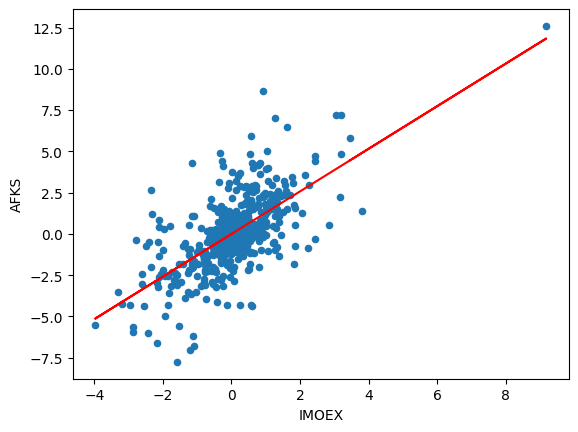

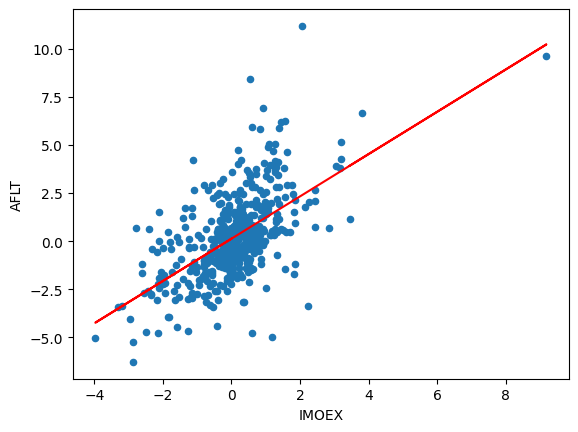

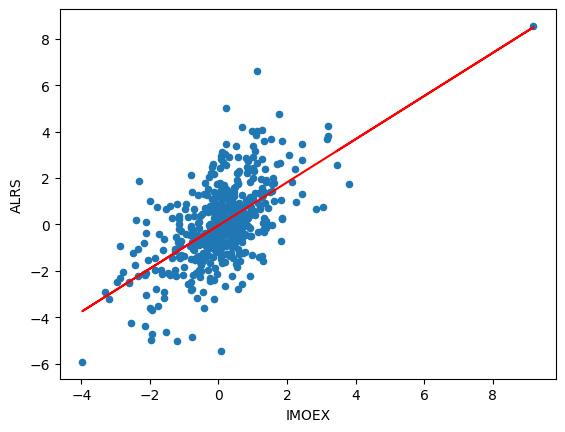

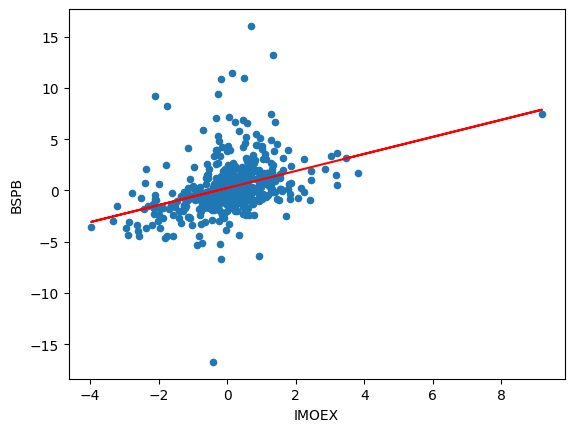

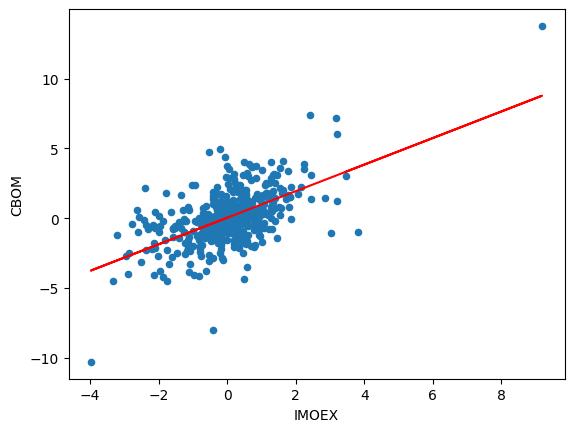

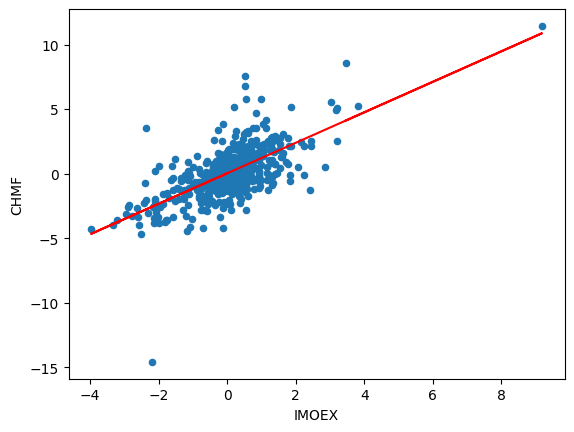

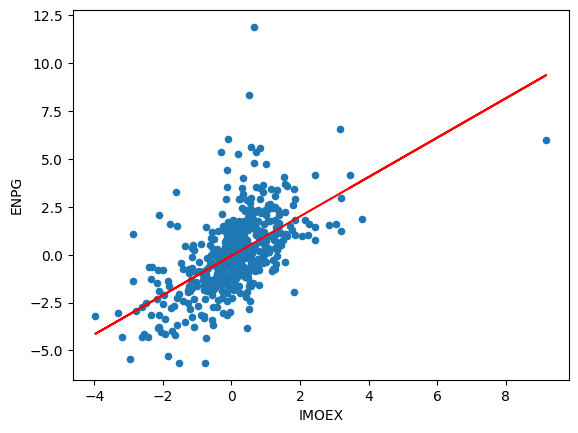

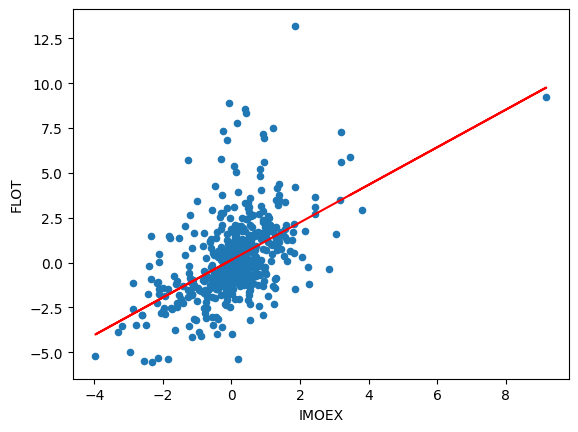

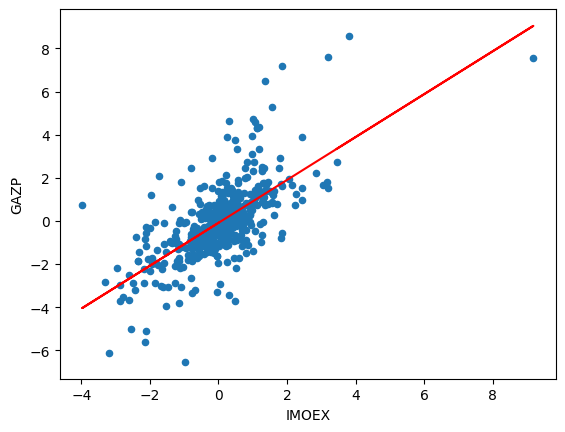

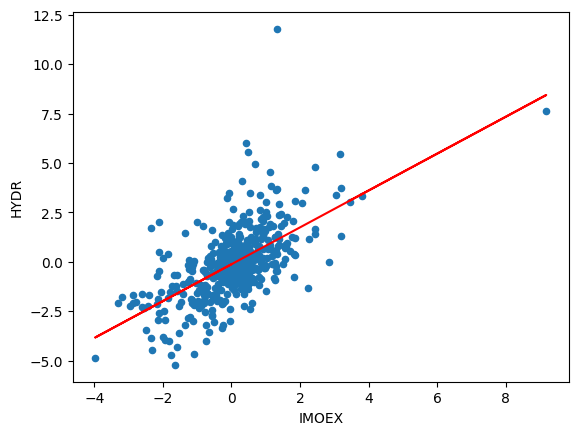

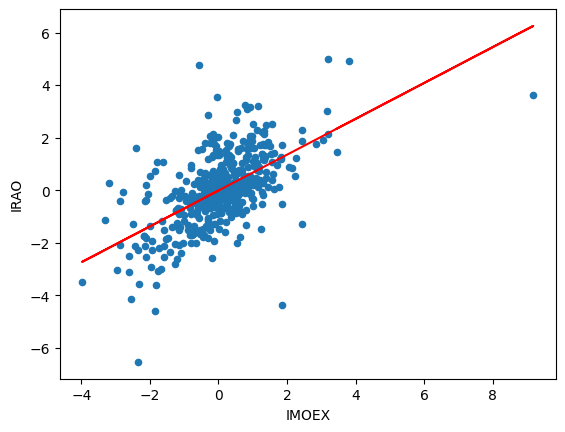

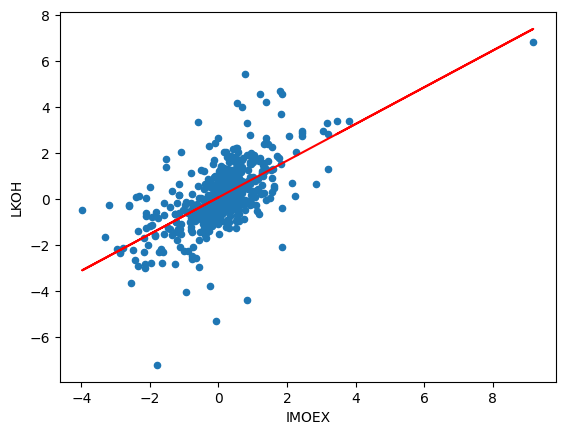

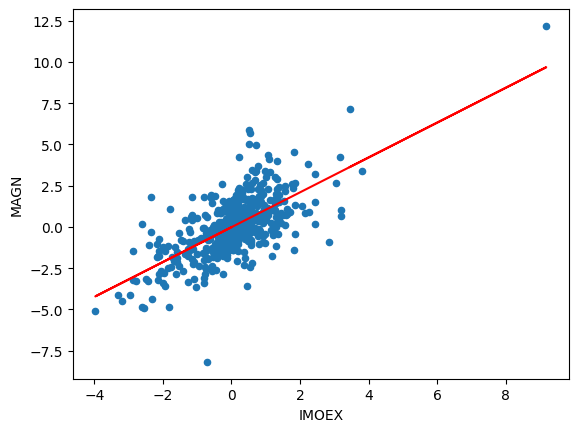

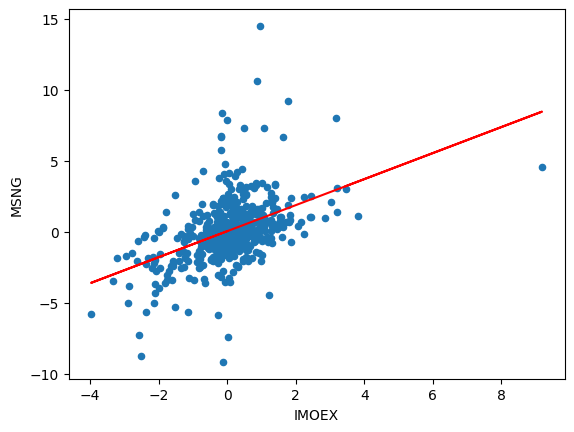

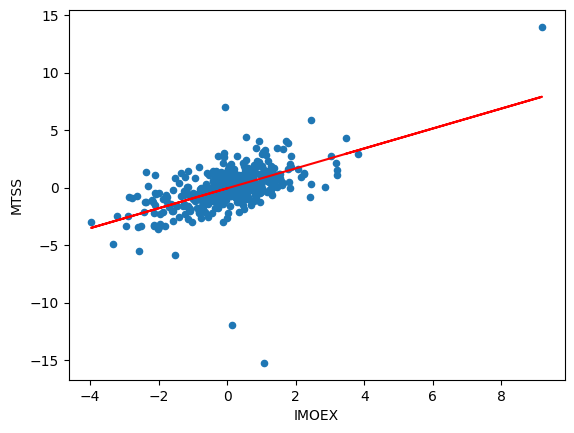

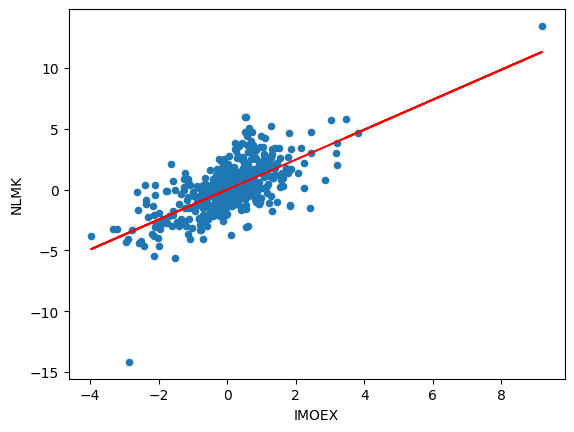

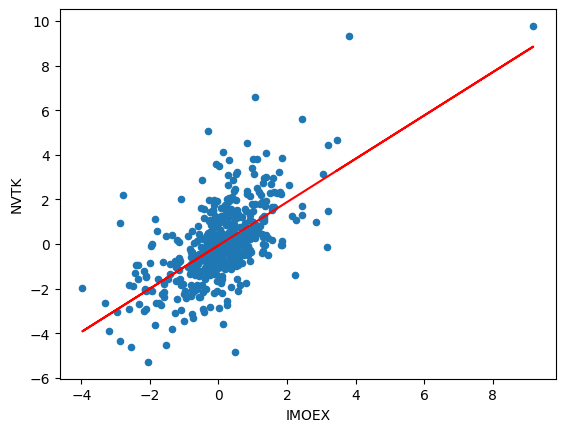

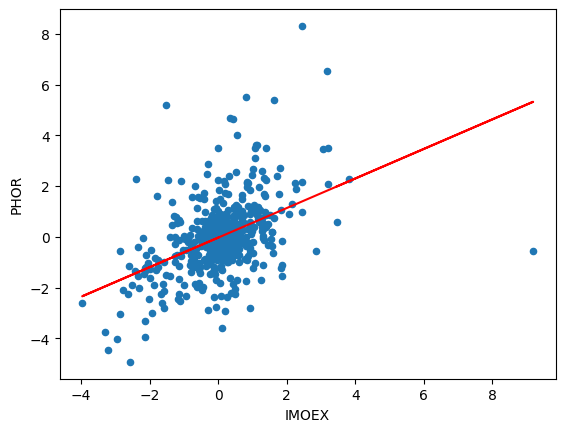

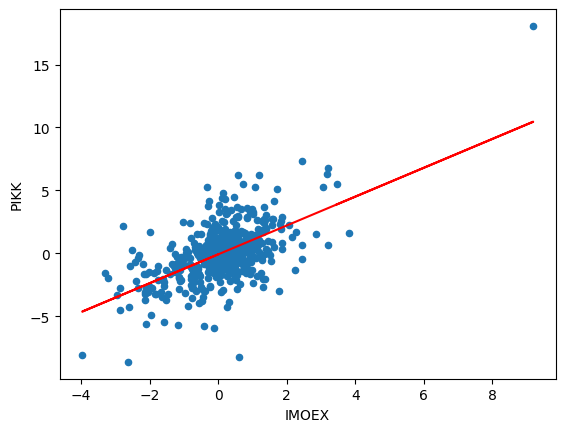

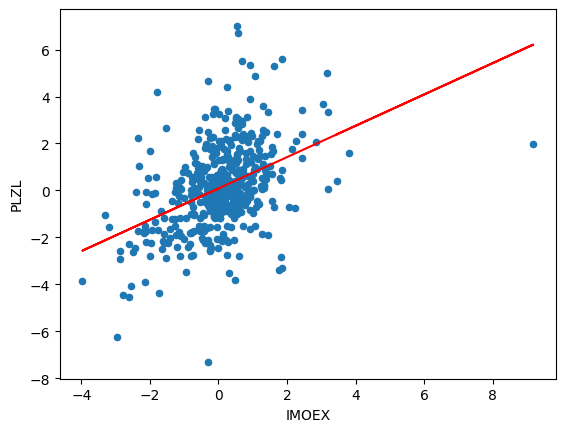

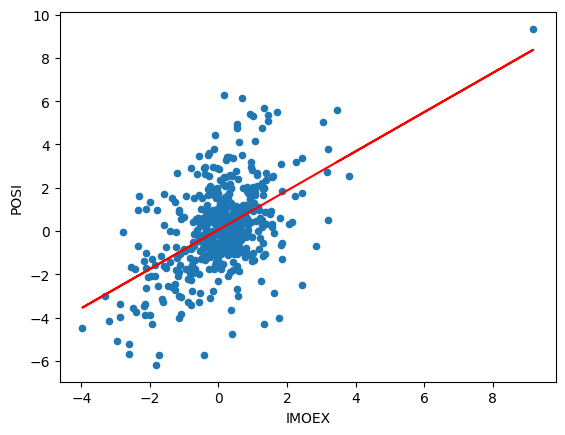

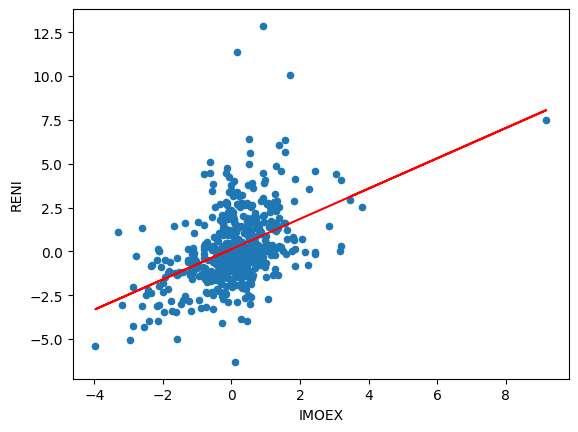

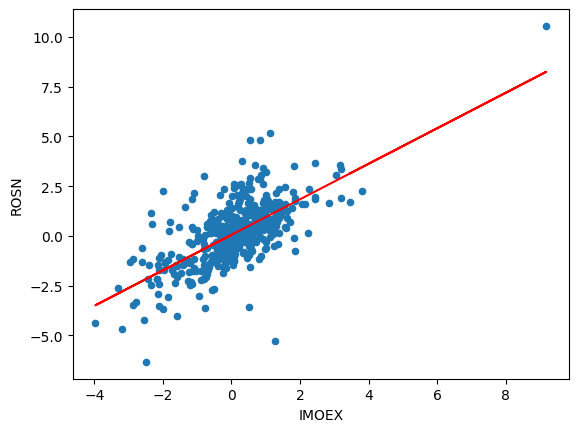

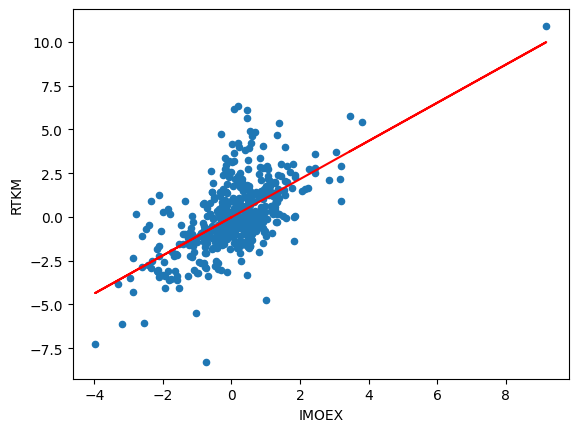

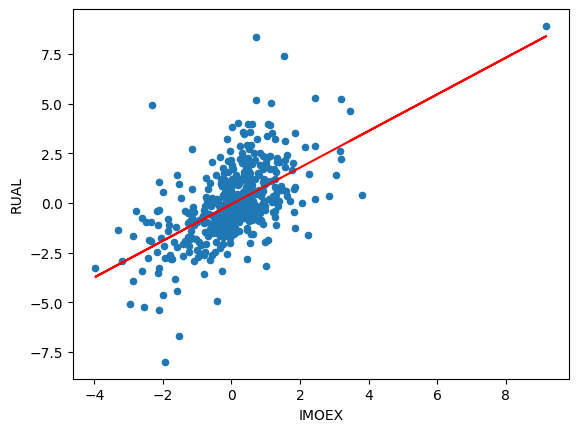

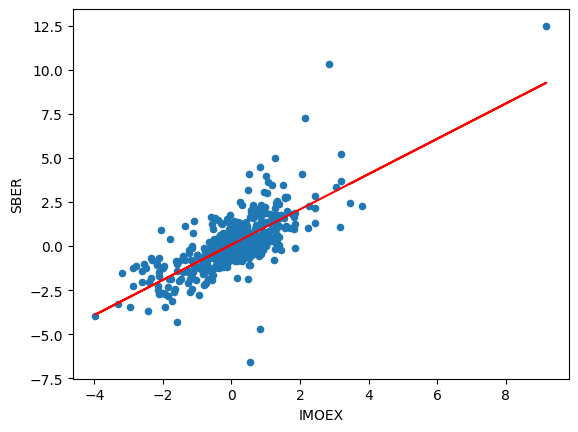

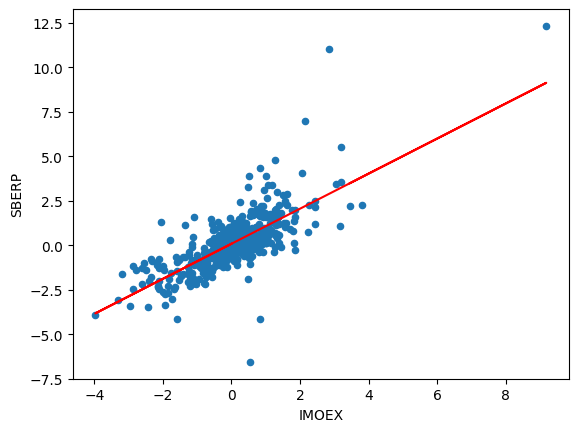

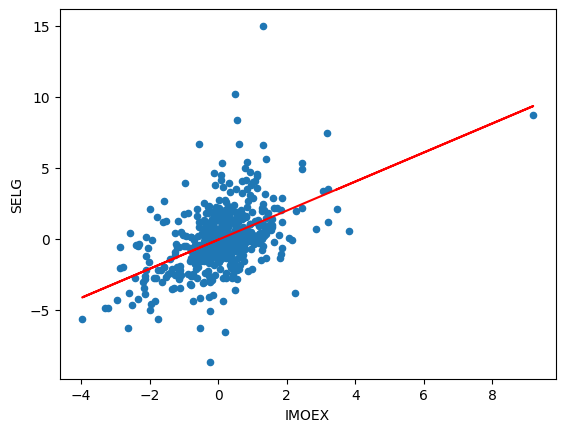

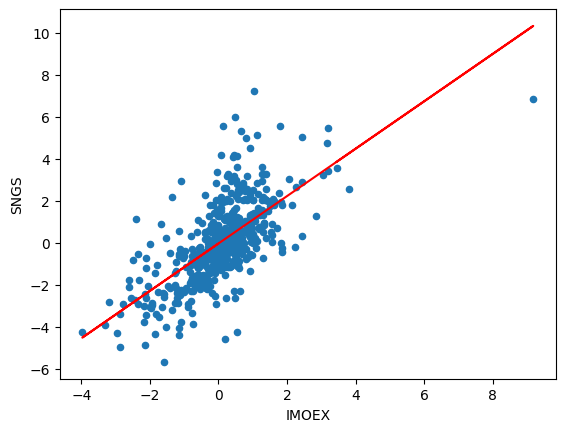

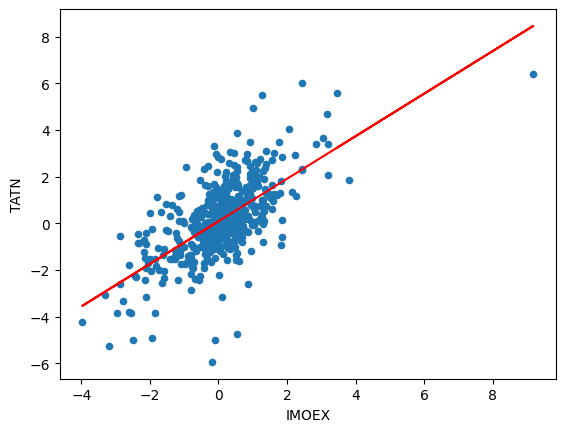

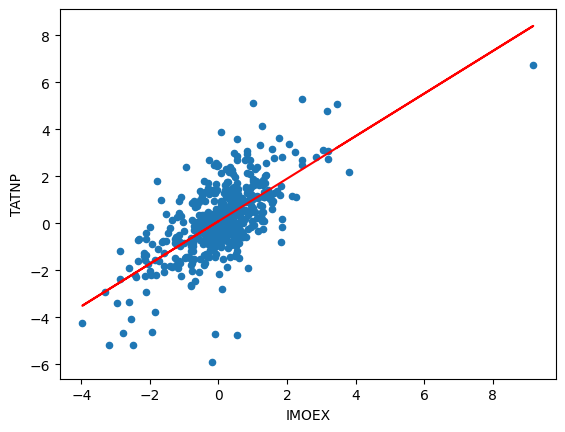

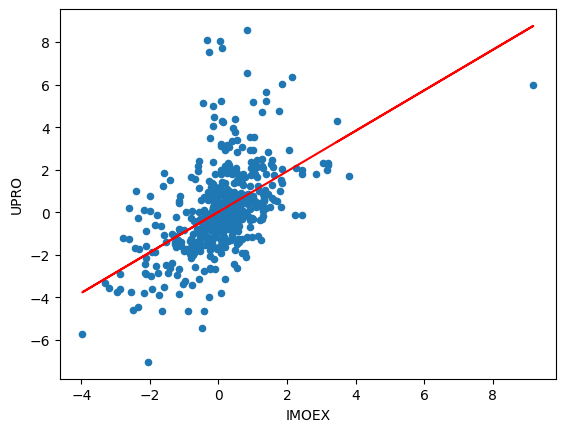

In [108]:
for i in stocks_daily_return.columns:
    if i != 'Date' and i != 'IMOEX':
        stocks_daily_return.plot(kind = 'scatter', x = 'IMOEX', y = i)
        b, a = np.polyfit(stocks_daily_return['IMOEX'], stocks_daily_return[i], 1)
        plt.plot(stocks_daily_return['IMOEX'], b * stocks_daily_return['IMOEX'] + a, '-', color = 'r')  
        beta[i] = b    
        alpha[i] = a  
        plt.show()

In [109]:
keys = list(beta.keys())

In [110]:
ER = {}

rf = 0 
rm = stocks_daily_return['IMOEX'].mean() * 252 

In [111]:
stocks_daily_return['IMOEX']

0      0.000000
1     -0.196071
2     -0.541869
3     -0.012983
4      0.329718
         ...   
505    1.555950
506    1.234618
507   -0.329650
508    1.059675
509    3.458249
Name: IMOEX, Length: 510, dtype: float64

In [112]:
rm

15.57528057025067

In [113]:
for i in keys:
    ER[i] = rf + (beta[i] * (rm-rf)) 

In [114]:
len(keys)

32

In [115]:
for i in keys:
    print('Expected Return Based on CAPM for {} is {}%'.format(i,ER[i]))

Expected Return Based on CAPM for AFKS is 20.08023404501681%
Expected Return Based on CAPM for AFLT is 17.104535726342274%
Expected Return Based on CAPM for ALRS is 14.48065087029611%
Expected Return Based on CAPM for BSPB is 12.963351013301878%
Expected Return Based on CAPM for CBOM is 14.817779345748349%
Expected Return Based on CAPM for CHMF is 18.39334608426958%
Expected Return Based on CAPM for ENPG is 15.985943048324753%
Expected Return Based on CAPM for FLOT is 16.28853711550625%
Expected Return Based on CAPM for GAZP is 15.48107962086617%
Expected Return Based on CAPM for HYDR is 14.52406956812938%
Expected Return Based on CAPM for IRAO is 10.628630659942026%
Expected Return Based on CAPM for LKOH is 12.42196423614049%
Expected Return Based on CAPM for MAGN is 16.45121213699395%
Expected Return Based on CAPM for MSNG is 14.272682915858065%
Expected Return Based on CAPM for MTSS is 13.511477855160464%
Expected Return Based on CAPM for NLMK is 19.209282704246455%
Expected Return 

In [116]:
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('AFKS', 0.0), ('AFLT', 0.0572), ('ALRS', 0.0), ('BSPB', 0.30346), ('CBOM', 0.0), ('CHMF', 0.0), ('ENPG', 0.0), ('FLOT', 0.10522), ('GAZP', 0.0), ('HYDR', 0.0), ('IRAO', 0.0), ('LKOH', 0.08992), ('MAGN', 0.0), ('MSNG', 0.0), ('MTSS', 0.0), ('NLMK', 0.0), ('NVTK', 0.0), ('PHOR', 0.0), ('PIKK', 0.0), ('PLZL', 0.05752), ('POSI', 0.0), ('RENI', 0.14205), ('ROSN', 0.0), ('RTKM', 0.0), ('RUAL', 0.0), ('SBER', 0.0), ('SBERP', 0.14724), ('SELG', 0.0), ('SNGS', 0.0), ('TATN', 0.0), ('TATNP', 0.09738), ('UPRO', 0.0)])


In [117]:
portfolio_weights =  1/32 * np.ones(32) 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)

In [118]:
ER_portfolio

14.9791929417776

In [119]:
print('Expected returns based on CAPM portfolio is {}%\n'.format(ER_portfolio))

Expected returns based on CAPM portfolio is 14.9791929417776%



In [120]:
er = pd.Series(data=ER)
er = er/100


In [121]:
ef1 = EfficientFrontier(er, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks


In [122]:
# Создаем объект EfficientFrontier
ef1 = EfficientFrontier(er, Sigma)

# Выполняем оптимизацию (например, максимизируем Sharpe Ratio)
ef1.max_sharpe(risk_free_rate=0.08)

# Теперь можно получить результаты
ef1.portfolio_performance(verbose=True, risk_free_rate=0.08)

Expected annual return: 17.6%
Annual volatility: 23.7%
Sharpe Ratio: 0.41


(0.17628011844017225, 0.23655533945329846, 0.40700885747362375)

In [123]:
S = risk_models.CovarianceShrinkage(pivot_df).ledoit_wolf()

# Оптимизация портфеля для максимального коэффициента Шарпа
ef1 = EfficientFrontier(er, S)
weights = ef1.max_sharpe(risk_free_rate=0.08)
cleaned_weights1 = ef1.clean_weights()

In [124]:
cleaned_weights1

OrderedDict([('AFKS', 0.13771),
             ('AFLT', 0.02161),
             ('ALRS', 0.0),
             ('BSPB', 0.0),
             ('CBOM', 0.0),
             ('CHMF', 0.08263),
             ('ENPG', 0.0),
             ('FLOT', 0.01483),
             ('GAZP', 0.10773),
             ('HYDR', 0.0),
             ('IRAO', 0.0),
             ('LKOH', 0.0),
             ('MAGN', 0.0),
             ('MSNG', 0.0),
             ('MTSS', 0.0),
             ('NLMK', 0.17242),
             ('NVTK', 0.0),
             ('PHOR', 0.0),
             ('PIKK', 0.07437),
             ('PLZL', 0.0),
             ('POSI', 0.0),
             ('RENI', 0.00166),
             ('ROSN', 0.0),
             ('RTKM', 0.06554),
             ('RUAL', 0.0),
             ('SBER', 0.14617),
             ('SBERP', 0.01397),
             ('SELG', 0.02616),
             ('SNGS', 0.1352),
             ('TATN', 0.0),
             ('TATNP', 0.0),
             ('UPRO', 0.0)])

In [125]:
# Расчет метрик
metrics = calculate_metrics(
    prices=pivot_df,
    weights=cleaned_weights,
    risk_free_rate=0.08,
    gamma=2,
    benchmark_prices=moex_df.close
)

# Вывод результатов
print("Оптимальные веса портфеля:", cleaned_weights)
print("\nМетрики портфеля:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

Оптимальные веса портфеля: OrderedDict([('AFKS', 0.0), ('AFLT', 0.09856), ('ALRS', 0.0), ('BSPB', 0.38646), ('CBOM', 0.0), ('CHMF', 0.0), ('ENPG', 0.0), ('FLOT', 0.16009), ('GAZP', 0.0), ('HYDR', 0.0), ('IRAO', 0.0), ('LKOH', 0.01054), ('MAGN', 0.0), ('MSNG', 0.0), ('MTSS', 0.0), ('NLMK', 0.0), ('NVTK', 0.0), ('PHOR', 0.0), ('PIKK', 0.0), ('PLZL', 0.0113), ('POSI', 0.0), ('RENI', 0.14893), ('ROSN', 0.0), ('RTKM', 0.0), ('RUAL', 0.0), ('SBER', 0.0), ('SBERP', 0.11078), ('SELG', 0.0), ('SNGS', 0.0), ('TATN', 0.0), ('TATNP', 0.07334), ('UPRO', 0.0)])

Метрики портфеля:
Cumulative Return: 1.8814
Sharpe Ratio: -4.9407
Sortino Ratio: -5.0712
CEQ: 0.0020
Max Drawdown: 0.2350
HHI: 0.2248
Tracking Error: nan
Turnover: 1.5813


# BL model

In [126]:
import pypfopt
pypfopt.__version__

'1.5.6'

In [127]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

In [128]:
pivot_df

ticker_name    AFKS   AFLT   ALRS    BSPB    CBOM    CHMF    ENPG   FLOT  \
begin                                                                      
2023-01-03   12.169  24.64  59.35  101.96   6.798   897.6  380.00  37.96   
2023-01-04   12.263  25.04  59.28  101.81   6.793   888.6  379.00  38.19   
2023-01-05   12.105  25.60  58.89  101.73   6.784   882.8  377.00  38.40   
2023-01-06   12.039  25.46  58.83  101.90   6.795   884.4  377.00  38.35   
2023-01-09   11.879  26.08  59.16  102.45   6.837   872.6  389.00  39.08   
...             ...    ...    ...     ...     ...     ...     ...    ...   
2024-12-25   14.155  54.86  52.96  336.95   9.772  1161.8  322.70  91.21   
2024-12-26   14.087  55.04  54.00  338.53  10.020  1174.4  325.15  89.12   
2024-12-27   14.278  55.65  54.69  347.33   9.916  1186.2  325.80  91.40   
2024-12-28   14.738  58.38  56.42  357.98   9.943  1232.2  334.30  93.75   
2024-12-30   15.594  59.06  57.86  369.20  10.247  1337.4  348.20  99.28   

ticker_name    GAZP    HYDR  ...    ROSN   RTKM    RUAL    SBER   SBERP  \
begin                        ...                                          
2023-01-03   163.52  0.7708  ...  368.05  56.12  40.900  141.78  141.43   
2023-01-04   162.51  0.7641  ...  365.80  55.89  40.820  141.43  140.98   
2023-01-05   161.20  0.7632  ...  367.50  55.85  40.565  141.27  140.58   
2023-01-06   162.10  0.7608  ...  367.30  55.90  40.620  141.40  140.12   
2023-01-09   162.71  0.7632  ...  367.95  56.75  40.695  142.40  141.99   
...             ...     ...  ...     ...    ...     ...     ...     ...   
2024-12-25   128.11  0.5025  ...  581.95  58.46  32.615  271.69  270.32   
2024-12-26   126.89  0.4984  ...  579.10  59.27  33.180  269.56  269.25   
2024-12-27   127.79  0.4996  ...  591.00  59.97  33.945  271.20  272.01   
2024-12-28   129.60  0.5052  ...  596.00  61.62  35.295  272.83  273.50   
2024-12-30   133.12  0.5206  ...  606.05  65.18  36.925  279.43  279.59   

ticker_name   SELG    SNGS   TATN  TATNP   UPRO  
begin                                            
2023-01-03   44.47  21.905  351.6  344.9  1.365  
2023-01-04   45.08  21.800  350.8  345.5  1.359  
2023-01-05   44.68  21.725  349.4  344.3  1.355  
2023-01-06   44.66  21.685  350.6  344.3  1.362  
2023-01-09   45.26  21.620  346.7  339.3  1.374  
...            ...     ...    ...    ...    ...  
2024-12-25   40.83  23.655  629.2  628.5  1.750  
2024-12-26   40.23  24.000  630.9  630.5  1.727  
2024-12-27   40.28  23.870  635.8  633.0  1.721  
2024-12-28   40.79  24.115  652.4  647.5  1.752  
2024-12-30   41.65  24.980  688.9  680.3  1.827  

[510 rows x 32 columns]

In [146]:
S = risk_models.CovarianceShrinkage(pivot_df).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(capm_df[['Date','IMOEX']].set_index('Date'))
delta

4.849712262836494

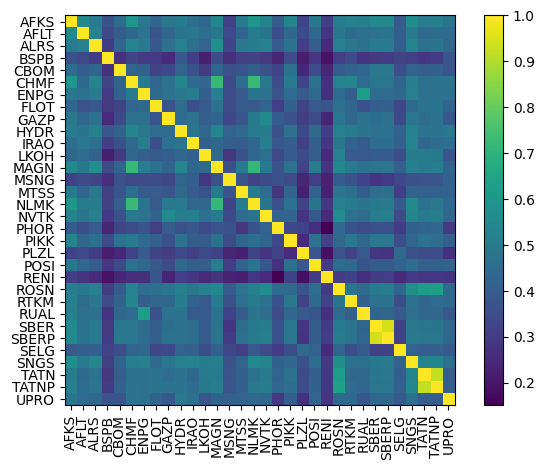

In [152]:
plotting.plot_covariance(S, plot_correlation=True);

In [148]:
df_s = df[df['begin']=='2024-12-30']
df_s['mcaps'] = df_s['close']*df_s['volume']

C:\Users\Артур\AppData\Local\Temp\ipykernel_12900\3020110491.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
df_ex = df_s.query(f"ticker_name not in ['ASTR','HEAD','FEES','MDMG','SVCB','MOEX','T','UGLD','VKCO','YDEX','GMKN','TRNFP']")

In [165]:
mcaps = dict(df_ex[['ticker_name','mcaps']].values)

In [166]:
len(mcaps)

32

In [167]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

ticker_name
AFKS     0.255890
AFLT     0.217314
ALRS     0.180232
BSPB     0.166391
CBOM     0.159398
CHMF     0.219107
ENPG     0.194531
FLOT     0.197307
GAZP     0.182182
HYDR     0.172851
IRAO     0.127426
LKOH     0.142521
MAGN     0.193275
MSNG     0.154227
MTSS     0.166198
NLMK     0.226713
NVTK     0.188732
PHOR     0.115140
PIKK     0.216956
PLZL     0.115756
POSI     0.178072
RENI     0.125933
ROSN     0.173390
RTKM     0.194848
RUAL     0.168040
SBER     0.197572
SBERP    0.190376
SELG     0.176889
SNGS     0.207593
TATN     0.168627
TATNP    0.164250
UPRO     0.183054
dtype: float64

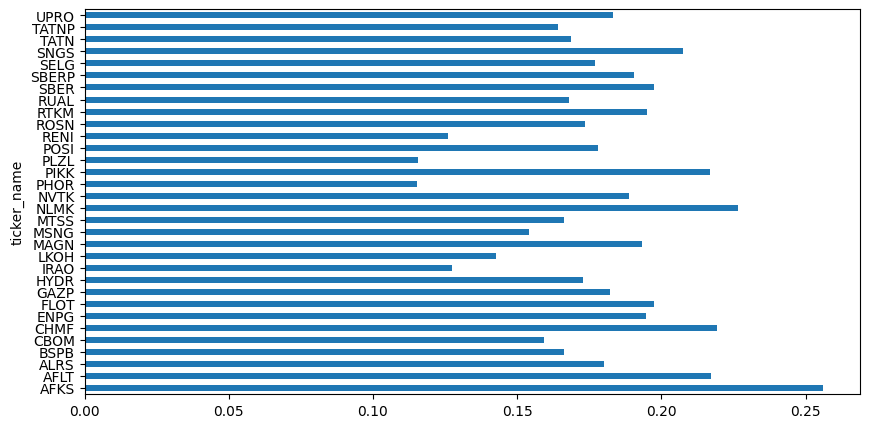

In [168]:
market_prior.plot.barh(figsize=(10,5));

In [179]:
viewdict = {'AFKS':-0.12,'AFLT':0.08,'ALRS':0.15,'BSPB':-0.05,'CBOM':0.07,
 'CHMF':0.18,'ENPG':-0.2,'FLOT':0.25,'GAZP':-0.1,
 'HYDR':0.09,'IRAO':0.04,'LKOH':0.12,'MAGN':0.2,'MSNG':-0.15,'MTSS':0.03,'NLMK':-0.08,'NVTK':0.17,'PHOR':-0.12,
 'PIKK':0.3,'PLZL':0.23,'POSI':0.1,'RENI':-0.07,'ROSN':-0.18,
 'RTKM':0.05,'RUAL':0.28,'SBER':0.09,'SBERP':0.11,'SELG':-0.25,
 'SNGS':0.13,'TATN':-0.05,'TATNP':0.04,
 'UPRO':0.02}

In [175]:
viewdict1 = {'AFKS':-0.12,'AFLT':0.08,'ALRS':0.15,'BSPB':-0.05,'CBOM':0.07,
 'CHMF':0.18,'ENPG':-0.2,'FLOT':0.25,'GAZP':-0.1,
 'HYDR':0.09,'IRAO':0.04,'LKOH':0.12,'MAGN':0.2,'MSNG':-0.15,
 'MTLR':0.05,'MTSS':0.03,'NLMK':-0.08,'NVTK':0.17,'PHOR':-0.12,
 'PIKK':0.3,'PLZL':0.23,'POSI':0.1,'RENI':-0.07,'ROSN':-0.18,
 'RTKM':0.05,'RUAL':0.28,'SBER':0.09,'SBERP':0.11,'SELG':-0.25,
 'SNGS':0.13,'SNGSP':0.15,'TATN':-0.05,'TATNP':0.04,
 'UPRO':0.02,'VTBR':0.08}

In [180]:
len(viewdict)

32

In [181]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [187]:
confidences = [0.75,0.75,0.2,0.75,0.75,0.75,0.75,0.75,0.75,0.75,
              0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,
              0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,
              0.75,0.75]

In [189]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)


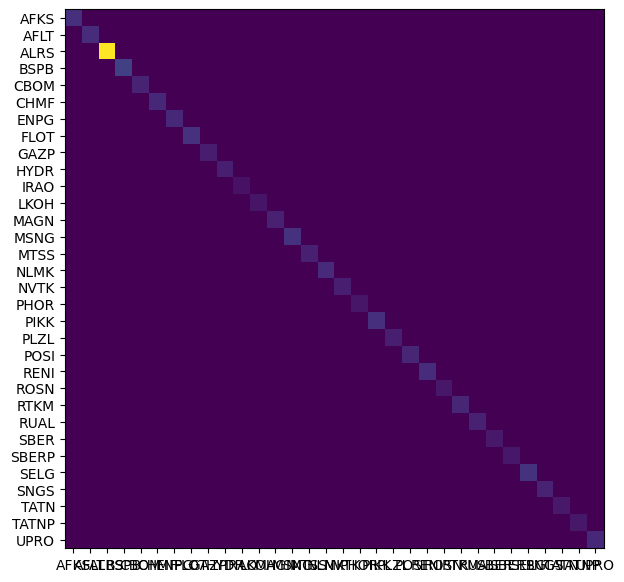

In [190]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [191]:
np.diag(bl.omega)

array([0.00209712, 0.00189659, 0.01511485, 0.00285212, 0.00144312,
       0.00169711, 0.00168964, 0.00215205, 0.00119298, 0.00124456,
       0.00074861, 0.00086641, 0.00136818, 0.00214035, 0.00131856,
       0.00178565, 0.0012623 , 0.00089546, 0.00206952, 0.00128544,
       0.0016344 , 0.00190349, 0.00099348, 0.00164641, 0.00136708,
       0.00103192, 0.00098533, 0.00222423, 0.00153343, 0.0010542 ,
       0.00099034, 0.00172925])

In [197]:
intervals = [(0.6,0.8),(0.6,0.8),(0.05,0.2),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),
             (0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),
             (0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),(0.6,0.8),
             (0.6,0.8),(0.6,0.8)
]

In [198]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.010000000000000007, 0.010000000000000007, 0.0056250000000000015, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007, 0.010000000000000007]


In [199]:
omega.shape

(32, 32)

In [200]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [201]:
ret_bl = bl.bl_returns()
ret_bl

ticker_name
AFKS     0.067061
AFLT     0.077990
ALRS     0.092277
BSPB     0.012544
CBOM     0.062323
CHMF     0.096492
ENPG     0.033415
FLOT     0.117607
GAZP     0.049558
HYDR     0.067907
IRAO     0.032705
LKOH     0.072166
MAGN     0.092385
MSNG    -0.019917
MTSS     0.060414
NLMK     0.068784
NVTK     0.088460
PHOR     0.012390
PIKK     0.138675
PLZL     0.065325
POSI     0.074412
RENI     0.017464
ROSN     0.041967
RTKM     0.076200
RUAL     0.087165
SBER     0.106131
SBERP    0.099559
SELG    -0.032714
SNGS     0.079303
TATN     0.048420
TATNP    0.045807
UPRO     0.043199
dtype: float64

In [202]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df

Prior  Posterior  Views
AFKS   0.255890   0.067061  -0.12
AFLT   0.217314   0.077990   0.08
ALRS   0.180232   0.092277   0.15
BSPB   0.166391   0.012544  -0.05
CBOM   0.159398   0.062323   0.07
CHMF   0.219107   0.096492   0.18
ENPG   0.194531   0.033415  -0.20
FLOT   0.197307   0.117607   0.25
GAZP   0.182182   0.049558  -0.10
HYDR   0.172851   0.067907   0.09
IRAO   0.127426   0.032705   0.04
LKOH   0.142521   0.072166   0.12
MAGN   0.193275   0.092385   0.20
MSNG   0.154227  -0.019917  -0.15
MTSS   0.166198   0.060414   0.03
NLMK   0.226713   0.068784  -0.08
NVTK   0.188732   0.088460   0.17
PHOR   0.115140   0.012390  -0.12
PIKK   0.216956   0.138675   0.30
PLZL   0.115756   0.065325   0.23
POSI   0.178072   0.074412   0.10
RENI   0.125933   0.017464  -0.07
ROSN   0.173390   0.041967  -0.18
RTKM   0.194848   0.076200   0.05
RUAL   0.168040   0.087165   0.28
SBER   0.197572   0.106131   0.09
SBERP  0.190376   0.099559   0.11
SELG   0.176889  -0.032714  -0.25
SNGS   0.207593   0.079303   0.13
TATN   0.168627   0.048420  -0.05
TATNP  0.164250   0.045807   0.04
UPRO   0.183054   0.043199   0.02

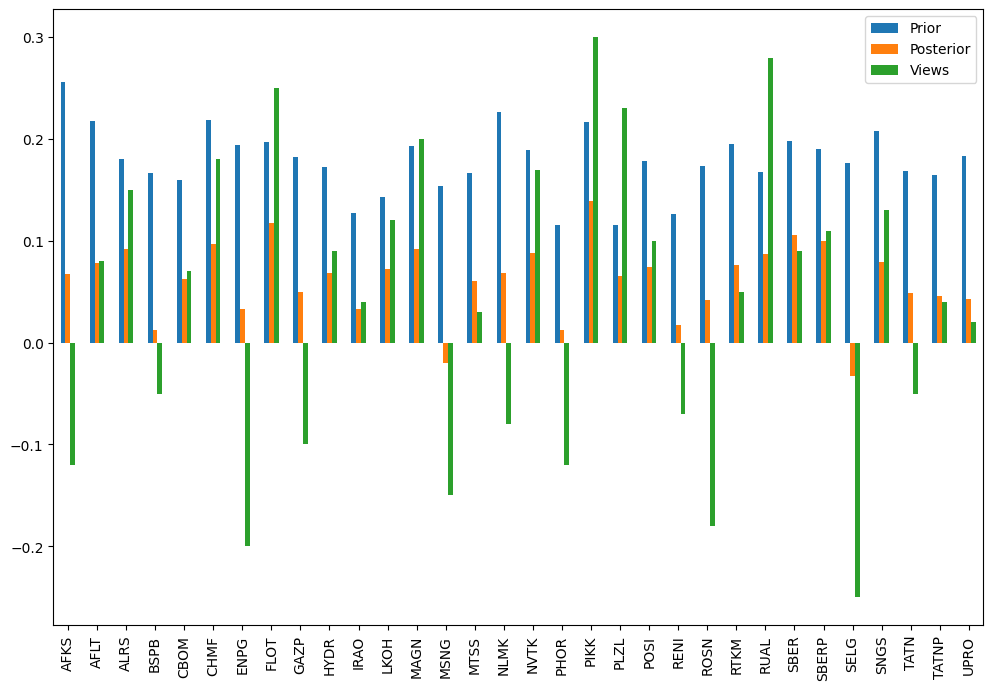

In [203]:
rets_df.plot.bar(figsize=(12,8));

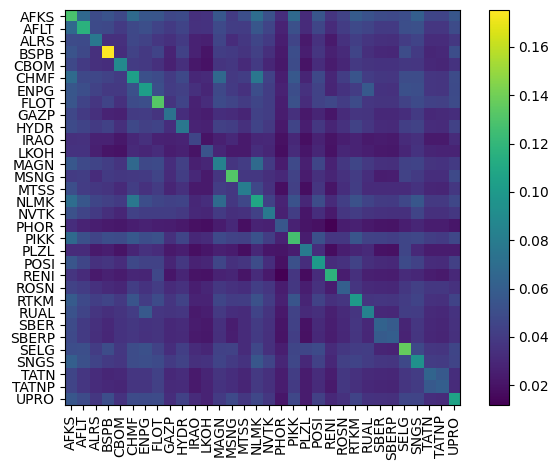

In [204]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

# Portfolio allocation

In [205]:
from pypfopt import EfficientFrontier, objective_functions

In [206]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

C:\PerfLogs\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.



OrderedDict([('AFKS', 0.0159),
             ('AFLT', 0.0348),
             ('ALRS', 0.05625),
             ('BSPB', 0.0),
             ('CBOM', 0.02873),
             ('CHMF', 0.05215),
             ('ENPG', 0.0),
             ('FLOT', 0.07472),
             ('GAZP', 0.01751),
             ('HYDR', 0.03161),
             ('IRAO', 0.00734),
             ('LKOH', 0.04657),
             ('MAGN', 0.05235),
             ('MSNG', 0.0),
             ('MTSS', 0.02664),
             ('NLMK', 0.02291),
             ('NVTK', 0.05302),
             ('PHOR', 0.0),
             ('PIKK', 0.09281),
             ('PLZL', 0.04083),
             ('POSI', 0.03689),
             ('RENI', 0.0),
             ('ROSN', 0.00834),
             ('RTKM', 0.03526),
             ('RUAL', 0.05266),
             ('SBER', 0.07328),
             ('SBERP', 0.06712),
             ('SELG', 0.0),
             ('SNGS', 0.03831),
             ('TATN', 0.01543),
             ('TATNP', 0.01354),
             ('UPRO', 0.00502)])

In [207]:
# Создаем объект EfficientFrontier
ef_bl = EfficientFrontier(ret_bl, S_bl)

# Выполняем оптимизацию (например, максимизируем Sharpe Ratio)
ef_bl.max_sharpe(risk_free_rate=0.08)

# Теперь можно получить результаты
ef_bl.portfolio_performance(verbose=True, risk_free_rate=0.08)

Expected annual return: 13.0%
Annual volatility: 29.3%
Sharpe Ratio: 0.17


(0.12999039179420824, 0.2931538519800611, 0.17052612973207099)

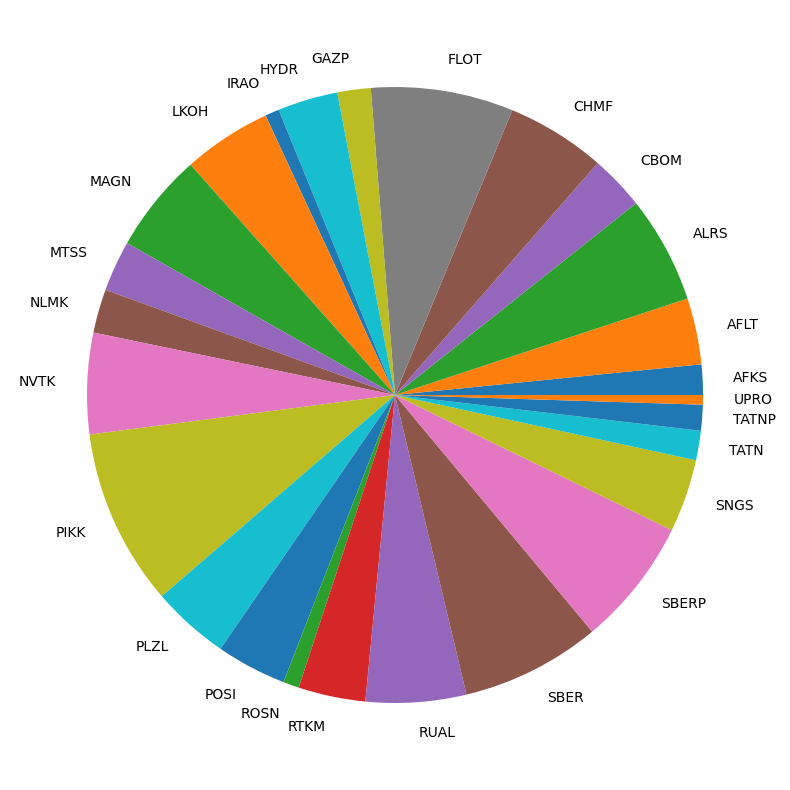

In [208]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [209]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, pivot_df.iloc[-1], total_portfolio_value=20000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Leftover: $738.50


C:\PerfLogs\Lib\site-packages\cvxpy\problems\problem.py:1504: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.



{'AFKS': 19,
 'AFLT': 12,
 'ALRS': 19,
 'CBOM': 56,
 'CHMF': 1,
 'FLOT': 15,
 'GAZP': 3,
 'HYDR': 1091,
 'IRAO': 33,
 'MAGN': 26,
 'MTSS': 3,
 'NLMK': 3,
 'NVTK': 1,
 'PIKK': 4,
 'PLZL': 1,
 'RTKM': 11,
 'RUAL': 29,
 'SBER': 5,
 'SBERP': 5,
 'SNGS': 31,
 'TATN': 1,
 'UPRO': 55}